### Data visualization

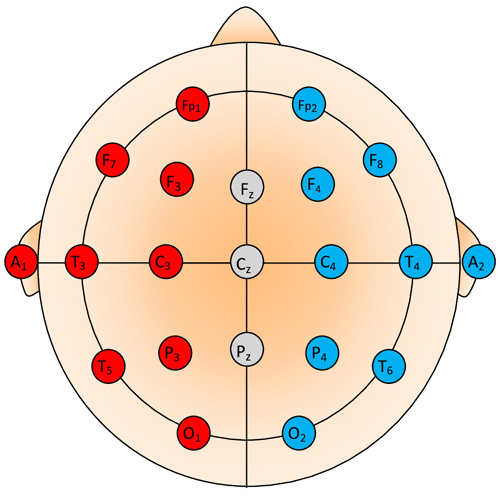

In [1]:
root = 'C:/Users/Haiya/Downloads/OneDrive_2025-09-19/Deidentified-all cohort/' 

In [3]:
csv = 'ID9-5_719_2.5.21.csv'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

In [7]:
csv_path = Path(root + csv)

# Load (try utf-8 first; fall back to latin-1 if needed)
try:
    df = pd.read_csv(csv_path)
except UnicodeDecodeError:
    df = pd.read_csv(csv_path, encoding="latin-1")

# Convert columns that look like "[...]" into lists
def parse_listlike(x):
    if isinstance(x, str):
        s = x.strip()
        if s.startswith('[') and s.endswith(']'):
            try:
                return ast.literal_eval(s)
            except Exception:
                return x
    return x
df = df.applymap(parse_listlike)

# Force the first two column names
cols = list(df.columns)
cols[0] = "ClockDateTime"
cols[1] = "Time"
df.columns = cols

# --- keep only complete minutes (exactly 60 rows per minute) ---
# Parse datetime (assumes MM/DD/YY HH:MM format; set dayfirst=True if needed)
df["ClockDateTime"] = pd.to_datetime(df["ClockDateTime"], errors="coerce", dayfirst=False)

# Coerce Time to numeric seconds (expected 0..59)
df["Time"] = pd.to_numeric(df["Time"], errors="coerce")

# Minute bin
minute_bin = df["ClockDateTime"].dt.floor("min")

# Count unique seconds per minute
sec_count = df.groupby(minute_bin)["Time"].nunique()

# Minutes to keep (exactly 60 unique seconds)
good_minutes = sec_count[sec_count == 60].index

# Filter
df = df[minute_bin.isin(good_minutes)].copy()

C:\Users\Haiya\AppData\Local\Temp\ipykernel_30272\1295191911.py:5: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
C:\Users\Haiya\AppData\Local\Temp\ipykernel_30272\1295191911.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(parse_listlike)
C:\Users\Haiya\AppData\Local\Temp\ipykernel_30272\1295191911.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["ClockDateTime"] = pd.to_datetime(df["ClockDateTime"], errors="coerce", dayfirst=False)


In [8]:
df.head()

ClockDateTime   Time ADR global, 8-13/1-4 Hz, All 1020 No FP  \
102 2021-02-05 00:11:00  101.0                                0.310941   
103 2021-02-05 00:11:00  102.0                                0.310941   
104 2021-02-05 00:11:00  103.0                                0.310941   
105 2021-02-05 00:11:00  104.0                                0.310941   
106 2021-02-05 00:11:00  105.0                                0.310941   

    ADR left, 8-13/1-4 Hz, Left Hemi (No Fp)  \
102                                 0.245945   
103                                 0.245945   
104                                 0.245945   
105                                 0.245945   
106                                 0.245945   

    ADR right, 8-13/1-4 Hz, Right Hemi (No Fp)  \
102                                   0.352083   
103                                   0.352083   
104                                   0.352083   
105                                   0.352083   
106                                   0.352083   

    TDR global , 4-8/1-4 Hz, All 1020 No FP  \
102                                 0.38479   
103                                 0.38479   
104                                 0.38479   
105                                 0.38479   
106                                 0.38479   

    TDR left, 4-8/1-4 Hz, Left Hemi (No Fp)  \
102                                0.297592   
103                                0.297592   
104                                0.297592   
105                                0.297592   
106                                0.297592   

    TDR left, 4-8/1-4 Hz, Right Hemi (No Fp)  \
102                                 0.438855   
103                                 0.438855   
104                                 0.438855   
105                                 0.438855   
106                                 0.438855   

    ATDR global , 4-13/1-4 Hz, All 1020 No FP  \
102                                  0.695731   
103                                  0.695731   
104                                  0.695731   
105                                  0.695731   
106                                  0.695731   

    ATDR left, 4-13/1-4 Hz, Left Hemi (No Fp)  ...  \
102                                  0.543537  ...   
103                                  0.543537  ...   
104                                  0.543537  ...   
105                                  0.543537  ...   
106                                  0.543537  ...   

    Amplitude 5th%ile 1 hour, SumValuesMin, aEEG All 1020 No FP_avg, [aEEG All 1020 No FP_avg]  \
102                                           0.435354                                           
103                                           0.435354                                           
104                                           0.435354                                           
105                                           0.435354                                           
106                                           0.435354                                           

    Amplitude 95%ile 1 hour, SumValuesMax, aEEG All 1020 No FP_avg, [aEEG All 1020 No FP_avg]  \
102                                            2.77941                                          
103                                            2.77941                                          
104                                            2.77941                                          
105                                            2.77941                                          
106                                            2.77941                                          

    Rel alpha variability left, FFT PowerRatio, 6-14/1-20 Hz, Left Hemisphere  \
102                                           0.257251                          
103                                           0.257251                          
104                                           0.257251                          
105 

### Asymetric

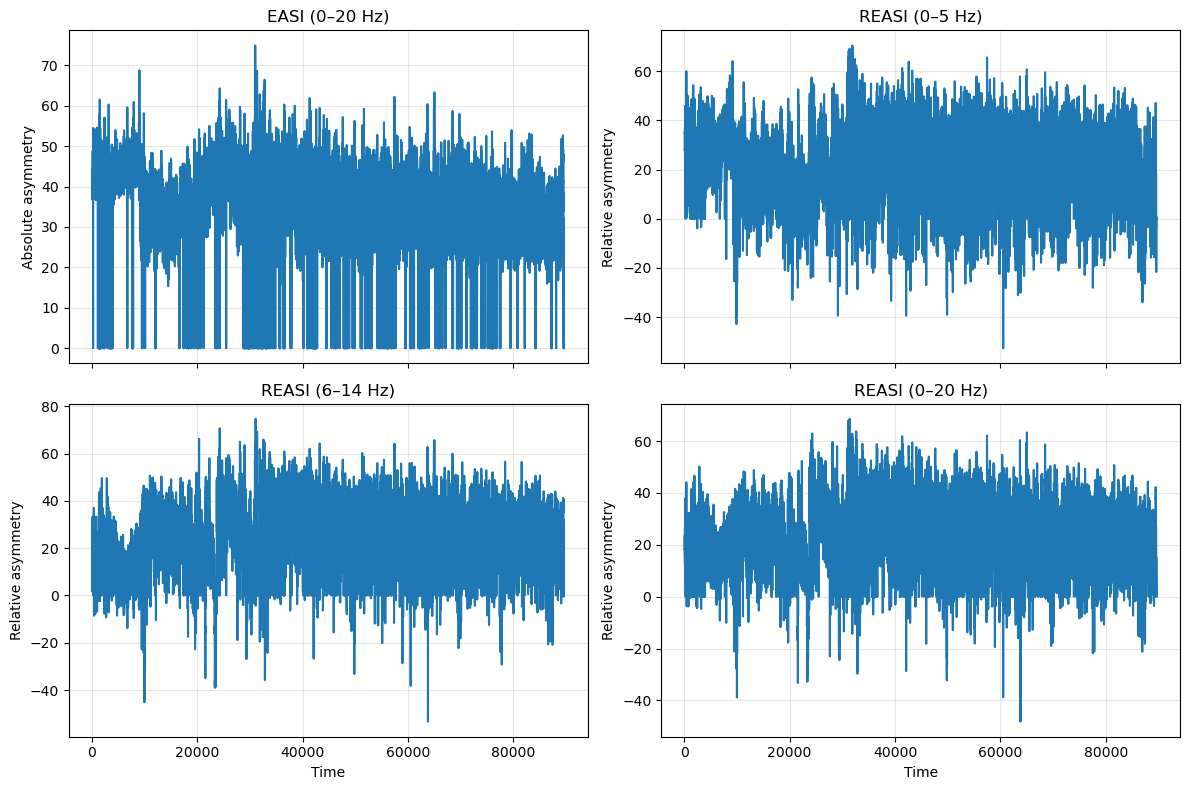

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Column names (adjust if needed)
col_easi      = "Asymmetry, Absolute Index (EASI) , 0 - 20 Hz, Asym Hemi"
col_reasi_05  = "Asymmetry, Relative Index (REASI) 0-5 hz, 0 - 5 Hz, Asym Hemi"
col_reasi_614 = "Asymmetry, Relative Index (REASI) 6-14 hz, 6 - 14 Hz, Asym Hemi"
col_reasi_020 = "Asymmetry, Relative Index (REASI) 0 -20hz, 0 - 20 Hz, Asym Hemi"

# Use raw numeric Time; NaN -> 0
ts = pd.to_numeric(df["Time"], errors="coerce").fillna(0)

# y-series numeric; NaN -> 0
y_easi      = pd.to_numeric(df[col_easi     ], errors="coerce").fillna(0)
y_reasi_05  = pd.to_numeric(df[col_reasi_05 ], errors="coerce").fillna(0)
y_reasi_614 = pd.to_numeric(df[col_reasi_614], errors="coerce").fillna(0)
y_reasi_020 = pd.to_numeric(df[col_reasi_020], errors="coerce").fillna(0)

# (optional) sort by Time so lines draw left→right; keeps ALL rows
order = ts.sort_values().index
ts_plot     = ts.loc[order]
y_easi      = y_easi.loc[order]
y_reasi_05  = y_reasi_05.loc[order]
y_reasi_614 = y_reasi_614.loc[order]
y_reasi_020 = y_reasi_020.loc[order]

# 2×2 plot
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axes = axes.ravel()

axes[0].plot(ts_plot, y_easi)
axes[0].set_title("EASI (0–20 Hz)")
axes[0].set_ylabel("Absolute asymmetry")

axes[1].plot(ts_plot, y_reasi_05)
axes[1].set_title("REASI (0–5 Hz)")
axes[1].set_ylabel("Relative asymmetry")

axes[2].plot(ts_plot, y_reasi_614)
axes[2].set_title("REASI (6–14 Hz)")
axes[2].set_ylabel("Relative asymmetry")
axes[2].set_xlabel("Time")

axes[3].plot(ts_plot, y_reasi_020)
axes[3].set_title("REASI (0–20 Hz)")
axes[3].set_ylabel("Relative asymmetry")
axes[3].set_xlabel("Time")

for ax in axes:
    ax.grid(True, alpha=0.3)

fig.tight_layout()
plt.show()


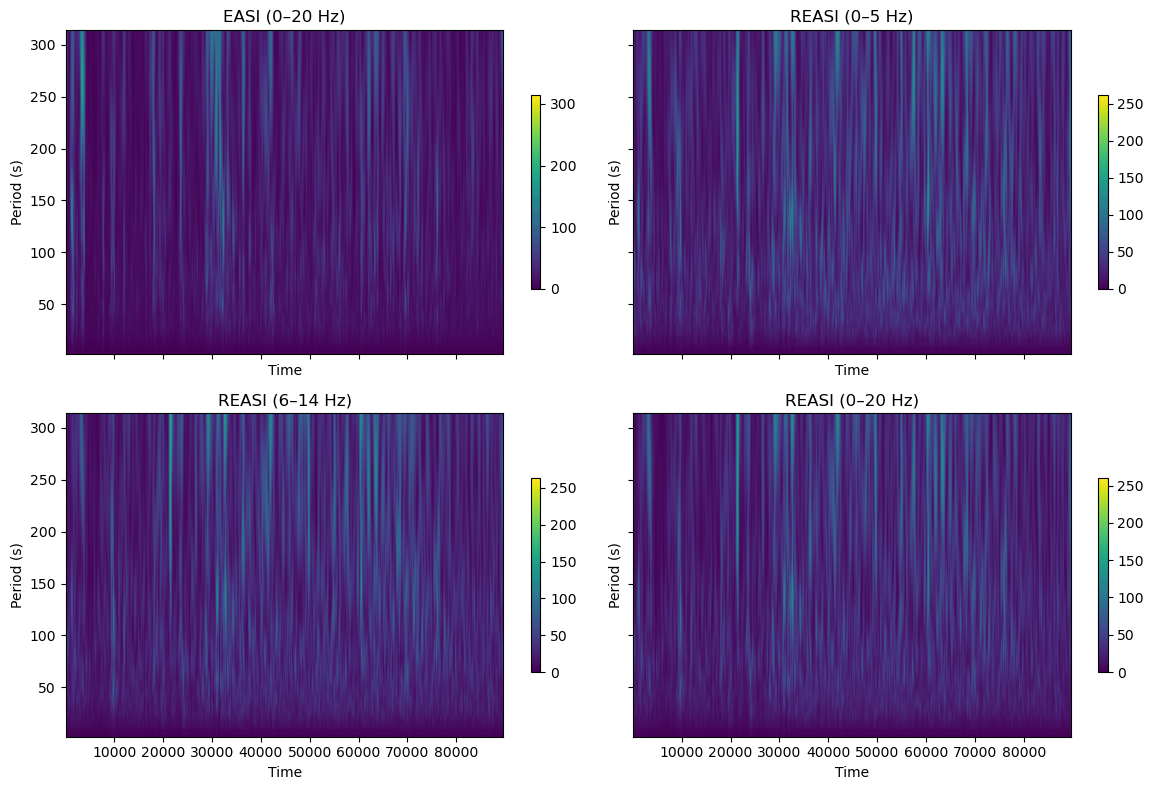

In [13]:
signals = [
    (y_easi, "EASI (0–20 Hz)"),
    (y_reasi_05, "REASI (0–5 Hz)"),
    (y_reasi_614, "REASI (6–14 Hz)"),
    (y_reasi_020, "REASI (0–20 Hz)")
]

wavelet = 'morl'
dt = 1.0  # seconds per sample; change if different
fc = pywt.central_frequency(wavelet)     # ~0.8125 for morl
f_nyq = 0.5 / dt                         # Hz
min_scale = int(np.ceil(fc / f_nyq))     # ensure f <= Nyquist
scales = np.arange(max(2, min_scale), 256)

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.ravel()

for ax, (sig, title) in zip(axes, signals):
    coeffs, freqs = pywt.cwt(sig, scales, wavelet, sampling_period=dt)  # freqs in Hz
    periods = 1.0 / freqs                                               # seconds
    im = ax.imshow(
        np.abs(coeffs),
        extent=[ts.min(), ts.max(), periods.min(), periods.max()],
        cmap='viridis', aspect='auto', origin='lower'
    )
    ax.set_title(title)
    ax.set_ylabel("Period (s)")
    ax.set_xlabel("Time")
    fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.6)

plt.tight_layout()
plt.show()

### Raw signal

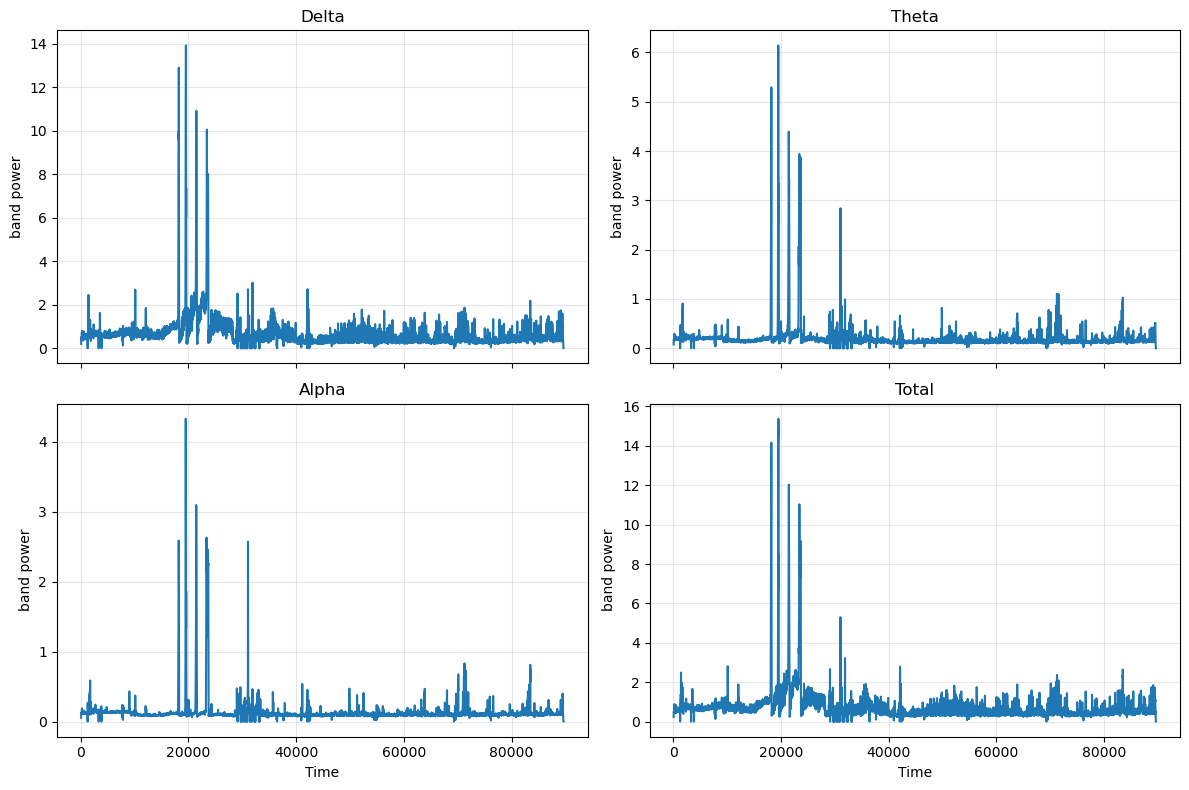

In [16]:
# Column names (adjust if needed)
Delta      = "Delta total FFT, 1 - 4 Hz, All 1020 No FP"
Theta  = "Theta total FFT, 4 - 8 Hz, All 1020 No FP"
Alpha = "Alpha total FFT, 8 - 13 Hz, All 1020 No FP"
Total = "Total pwr global, 1 - 20 Hz, All 1020 No FP"

# Use raw numeric Time; NaN -> 0
ts = pd.to_numeric(df["Time"], errors="coerce").fillna(0)

# y-series numeric; NaN -> 0
Delta      = pd.to_numeric(df[Delta     ], errors="coerce").fillna(0)
Theta  = pd.to_numeric(df[Theta ], errors="coerce").fillna(0)
Alpha = pd.to_numeric(df[Alpha], errors="coerce").fillna(0)
Total = pd.to_numeric(df[Total], errors="coerce").fillna(0)

# (optional) sort by Time so lines draw left→right; keeps ALL rows
order = ts.sort_values().index
ts_plot     = ts.loc[order]
y_easi      = Delta.loc[order]
y_reasi_05  = Theta.loc[order]
y_reasi_614 = Alpha.loc[order]
y_reasi_020 = Total.loc[order]

k = np.ones(25, dtype=float) / 25.0
y_easi      = np.convolve(y_easi.values,      k, mode="same")
y_reasi_05  = np.convolve(y_reasi_05.values,  k, mode="same")
y_reasi_614 = np.convolve(y_reasi_614.values, k, mode="same")
y_reasi_020 = np.convolve(y_reasi_020.values, k, mode="same")


# 2×2 plot
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axes = axes.ravel()

axes[0].plot(ts_plot, y_easi)
axes[0].set_title("Delta")
axes[0].set_ylabel("band power")

axes[1].plot(ts_plot, y_reasi_05)
axes[1].set_title("Theta")
axes[1].set_ylabel("band power")

axes[2].plot(ts_plot, y_reasi_614)
axes[2].set_title("Alpha")
axes[2].set_ylabel("band power")
axes[2].set_xlabel("Time")

axes[3].plot(ts_plot, y_reasi_020)
axes[3].set_title("Total")
axes[3].set_ylabel("band power")
axes[3].set_xlabel("Time")

for ax in axes:
    ax.grid(True, alpha=0.3)

fig.tight_layout()
plt.show()


### Left vs right WTC

Text(0, 0.5, 'band power')

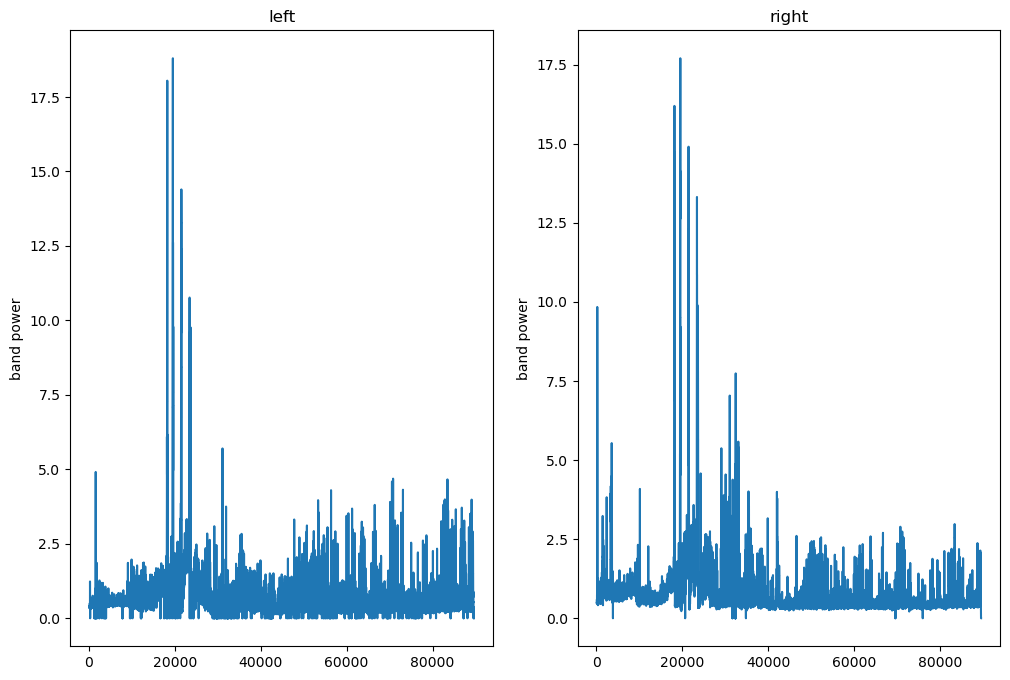

In [21]:
factor1 = "Total pwr left, 1 - 20 Hz, Left Hemi (No Fp)"
factor2 = "Total pwr right, 1 - 20 Hz, Right Hemi (No Fp)"

left      = "Total pwr left, 1 - 20 Hz, Left Hemi (No Fp)"
right  = "Total pwr right, 1 - 20 Hz, Right Hemi (No Fp)"
ts = pd.to_numeric(df["Time"], errors="coerce").fillna(0)
left      = pd.to_numeric(df[left     ], errors="coerce").fillna(0)
right  = pd.to_numeric(df[right ], errors="coerce").fillna(0)
# 
order = ts.sort_values().index
ts_plot     = ts.loc[order]
left      = left.loc[order]
right  = right.loc[order]
# 
# 1×2 plot
fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharex=True)
axes = axes.ravel()

axes[0].plot(ts_plot, left)
axes[0].set_title("left")
axes[0].set_ylabel("band power")

axes[1].plot(ts_plot, right)
axes[1].set_title("right")
axes[1].set_ylabel("band power")

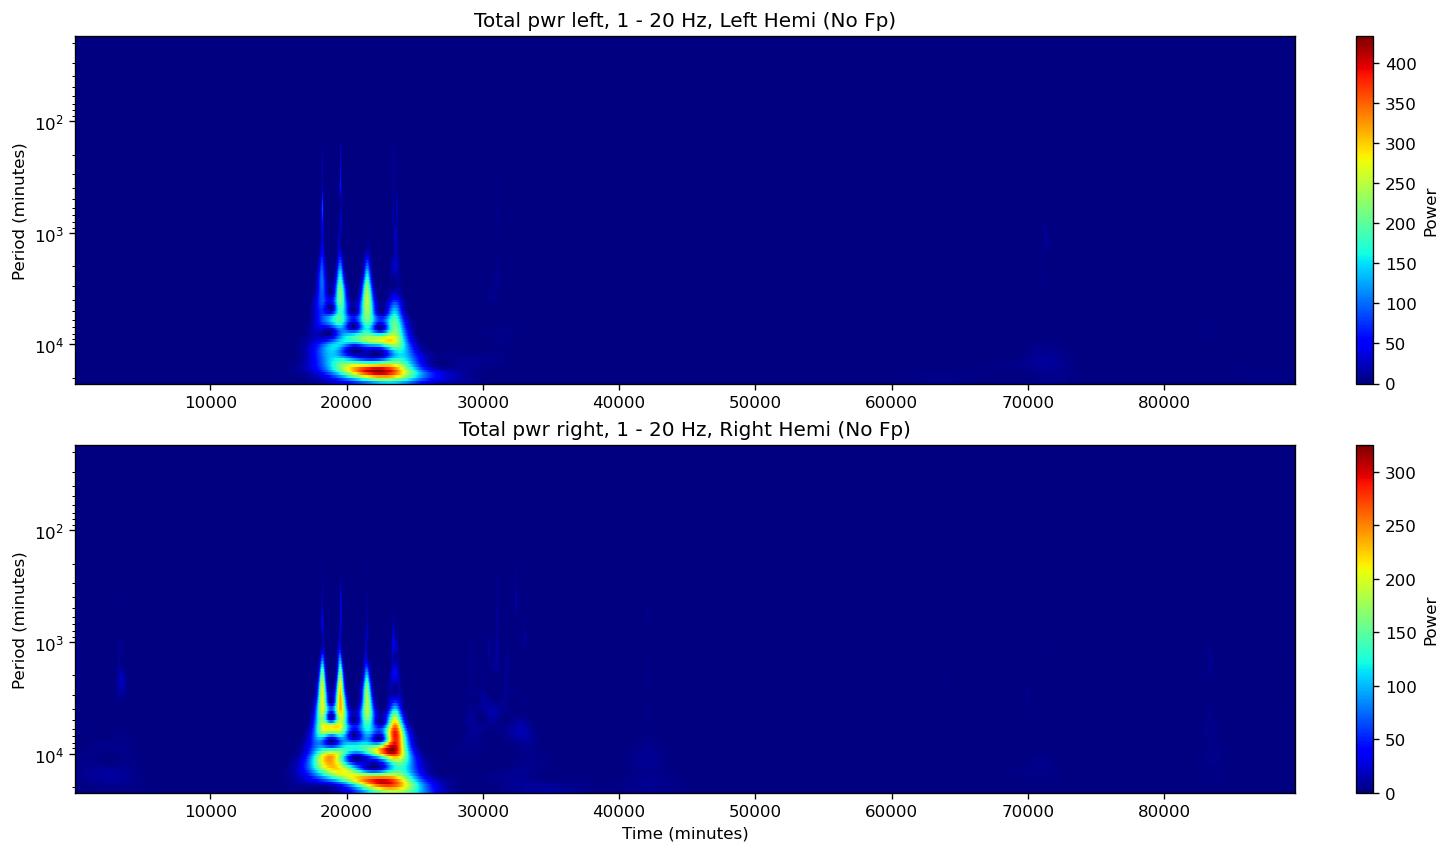

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from pycwt import wavelet

# -------------------
# Config (edit factors here)
# -------------------
# factor1 = 'NBPm (mmHg)'
# factor2 = 'rSO2-1 (%)'

# -------------------
# Pull data (Time already in minutes)
# -------------------
t_raw = df['Time'].to_numpy(float)
x_raw = df[factor1].to_numpy(float)
y_raw = df[factor2].to_numpy(float)

# -------------------
# Helpers
# -------------------
def interp_uniform_safe(t, s, max_points=10000):
    """Uniform grid with bounded size; removes NaNs & duplicate timestamps."""
    m = np.isfinite(t) & np.isfinite(s)
    t = np.asarray(t[m], float)
    s = np.asarray(s[m], float)
    if t.size < 2:
        raise ValueError("Not enough points after filtering.")
    order = np.argsort(t)
    t = t[order]; s = s[order]

    # collapse exact duplicate times
    dt = np.diff(t)
    keep = np.hstack(([True], dt != 0))
    t_u = t[keep]; s_u = s[keep]

    n_target = min(max_points, max(2, t_u.size))
    t_uni = np.linspace(t_u[0], t_u[-1], n_target)
    s_uni = np.interp(t_uni, t_u, s_u)
    eff_dt = (t_uni[-1] - t_uni[0]) / (n_target - 1)
    return t_uni, s_uni, float(eff_dt)

def centers_to_edges(c):
    """Convert center coords -> edges of length len(c)+1 (for shading='flat')."""
    c = np.asarray(c, float).ravel()
    if c.size < 2:
        return np.array([c[0]-0.5, c[0]+0.5], float)
    dc = np.diff(c)
    e = np.empty(c.size + 1, float)
    e[1:-1] = c[:-1] + dc/2
    e[0]    = c[0]  - dc[0]/2
    e[-1]   = c[-1] + dc[-1]/2
    return e

def cwt_wrap(sig, dt, dj, s0, J, wv='morlet'):
    """Return (W, scales, coi) across pycwt variants."""
    out = wavelet.cwt(sig, dt, dj=dj, s0=s0, J=J, wavelet=wv)
    W, scales = out[0], out[1]
    coi = out[3] if len(out) >= 4 else None
    return W, np.asarray(scales, float), (None if coi is None else np.asarray(coi, float))

# -------------------
# Uniformize both signals on the same grid
# -------------------
t, x, dt = interp_uniform_safe(t_raw, x_raw, max_points=10000)
_, y, _  = interp_uniform_safe(t_raw, y_raw, max_points=len(t))

# Z-score each
def zscore(a):
    a = np.asarray(a, float)
    mu, sd = a.mean(), a.std()
    return (a - mu) / (sd if sd else 1.0)

x = zscore(x)
y = zscore(y)

# -------------------
# Scale ladder (time unit = minutes)
# -------------------
VOICES = 12
dj = 1.0 / VOICES
W0 = 6.0
FOURIER_FACTOR = 4*np.pi / (W0 + np.sqrt(2 + W0**2))  # ~1.033

period_min = 2.0 * dt
period_max = (t[-1] - t[0]) / 4.0
s0   = period_min / (FOURIER_FACTOR * dt)
smax = period_max / (FOURIER_FACTOR * dt)
J    = int(np.floor(np.log2(smax / s0) / dj))

# -------------------
# CWTs
# -------------------
Wx, scales, _  = cwt_wrap(x, dt, dj, s0, J, wv='morlet')
Wy, scales2, _ = cwt_wrap(y, dt, dj, s0, J, wv='morlet')
# (scales2 should match scales)
periods = FOURIER_FACTOR * scales * dt  # minutes

Px = np.abs(Wx)**2
Py = np.abs(Wy)**2

# -------------------
# Plot scalograms with correct edges
# -------------------
Ns_x, Nt_x = Px.shape
Ns_y, Nt_y = Py.shape

# Build edges that match each C's shape
t_edges_x = centers_to_edges(t[:Nt_x])         # length Nt_x + 1
p_edges_x = centers_to_edges(periods[:Ns_x])   # length Ns_x + 1

t_edges_y = centers_to_edges(t[:Nt_y])         # length Nt_y + 1
p_edges_y = centers_to_edges(periods[:Ns_y])   # length Ns_y + 1

fig, axes = plt.subplots(2, 1, figsize=(12, 7), dpi=120, constrained_layout=True)

# Top: factor1
ax = axes[0]
im = ax.pcolormesh(t_edges_x, p_edges_x, Px, cmap='jet', shading='flat')
ax.set_title(factor1)
ax.set_ylabel('Period (minutes)')
ax.set_yscale('log'); ax.invert_yaxis()
fig.colorbar(im, ax=ax, label='Power')

# Bottom: factor2
ax = axes[1]
im = ax.pcolormesh(t_edges_y, p_edges_y, Py, cmap='jet', shading='flat')
ax.set_title(factor2)
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Period (minutes)')
ax.set_yscale('log'); ax.invert_yaxis()
fig.colorbar(im, ax=ax, label='Power')

plt.show()

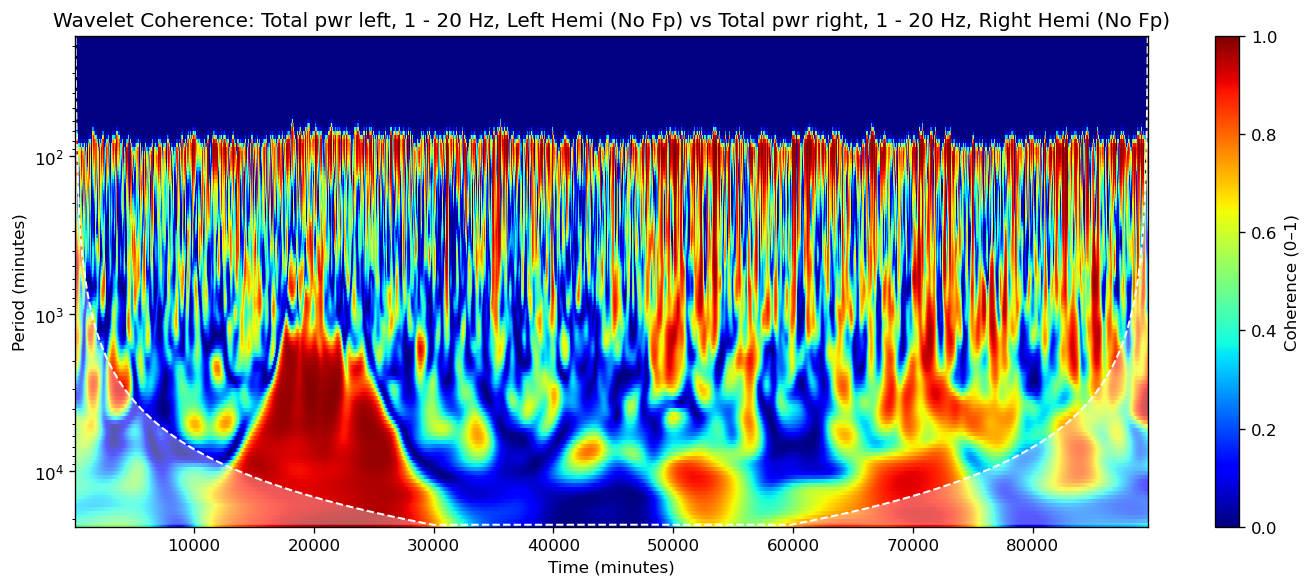

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from pycwt import wavelet

# =========================
# Helpers
# =========================
def _prep_unique_sorted(t, s):
    """Keep finite, sort by time, collapse duplicate timestamps."""
    m = np.isfinite(t) & np.isfinite(s)
    t = np.asarray(t[m], float)
    s = np.asarray(s[m], float)
    if t.size < 2:
        raise ValueError("Not enough points after filtering.")
    order = np.argsort(t)
    t = t[order]; s = s[order]
    dt = np.diff(t)
    keep = np.hstack(([True], dt != 0))
    return t[keep], s[keep]

def centers_to_edges(c):
    """Convert centers -> edges (len+1) for pcolormesh(shading='flat')."""
    c = np.asarray(c, float).ravel()
    if c.size < 2:
        return np.array([c[0]-0.5, c[0]+0.5], float)
    dc = np.diff(c)
    e = np.empty(c.size + 1, float)
    e[1:-1] = c[:-1] + dc/2
    e[0]    = c[0]  - dc[0]/2
    e[-1]   = c[-1] + dc[-1]/2
    return e

def cwt_wrap(sig, dt, dj, s0, J, wv='morlet'):
    """Return (W, scales, coi) robustly across pycwt variants."""
    out = wavelet.cwt(sig, dt, dj=dj, s0=s0, J=J, wavelet=wv)
    W, scales = out[0], out[1]
    coi = out[3] if len(out) >= 4 else None
    return W, np.asarray(scales, float), (None if coi is None else np.asarray(coi, float))

def _smooth_time_scale(A, scales, dt, dj):
    """Gaussian time smoothing (σ≈√2·scale/dt) + boxcar across scales (~1/dj)."""
    A = np.asarray(A)
    Ns, Nt = A.shape
    out = np.empty((Ns, Nt), dtype=np.complex128)
    scales = np.asarray(scales, float).ravel()
    for i, s in enumerate(scales):
        sigma_t = max(1e-9, np.sqrt(2.0) * (s / dt))   # in samples
        L = int(np.ceil(6.0 * sigma_t))                # ~±3σ
        if 2*L + 1 > Nt:
            L = max(1, (Nt - 1) // 2)
        if L < 1:
            out[i, :] = A[i, :]
            continue
        kx = np.arange(-L, L + 1, dtype=float)
        g = np.exp(-(kx**2) / (2.0 * sigma_t**2)); g /= g.sum()
        conv = np.convolve(A[i, :], g, mode='same')
        out[i, :] = conv[:Nt]
    # scale smoothing
    w = max(1, int(round(1.0 / dj)))
    if w > 1:
        box = np.ones(w, dtype=float) / w
        for tcol in range(Nt):
            out[:, tcol] = np.convolve(out[:, tcol], box, mode='same')[:Ns]
    return out

def wtc_from_cwt(Wx, Wy, scales, dt, dj, eps=1e-12):
    """Grinsted/Torrence WTC from CWTs."""
    scales = np.asarray(scales, float).ravel()
    s_inv = (1.0 / scales)[:, None]
    Wxy = Wx * np.conj(Wy)
    Sxy = _smooth_time_scale(Wxy * s_inv, scales, dt, dj)
    Sxx = _smooth_time_scale((np.abs(Wx)**2) * s_inv, scales, dt, dj)
    Syy = _smooth_time_scale((np.abs(Wy)**2) * s_inv, scales, dt, dj)
    WCT = (np.abs(Sxy)**2) / (Sxx * Syy + eps)
    return np.clip(WCT.real, 0.0, 1.0)

def coi_to_period(coi, scales, dt, fourier_factor):
    """If COI looks like scales, convert to period; else assume already period."""
    coi = np.asarray(coi, float).ravel()
    scales = np.asarray(scales, float).ravel()
    if np.nanmax(coi) <= np.nanmax(scales) * 1.05:
        return fourier_factor * coi * dt
    return coi

def match_len(x_ref, y):
    y = np.asarray(y, float).ravel(); x_ref = np.asarray(x_ref, float).ravel()
    if y.size == x_ref.size: return y
    idx = np.linspace(0, y.size - 1, x_ref.size)
    return np.interp(idx, np.arange(y.size), y)

# =========================
# Data (assumes df, factor1, factor2 exist; Time in minutes)
# =========================
t_raw = df['Time'].to_numpy(float)
x_raw = df[factor1].to_numpy(float)
y_raw = df[factor2].to_numpy(float)

# =========================
# Shared uniform grid (fixes Wx/Wy mismatch)
# =========================
tx_u, x_u = _prep_unique_sorted(t_raw, x_raw)
ty_u, y_u = _prep_unique_sorted(t_raw, y_raw)

t0 = max(tx_u[0], ty_u[0])
t1 = min(tx_u[-1], ty_u[-1])
if not (t1 > t0):
    raise ValueError("No overlapping time interval between the two signals.")

n_target = int(min(10000, tx_u.size, ty_u.size))
n_target = max(n_target, 1024)
t = np.linspace(t0, t1, n_target).astype(float)
dt = float((t[-1] - t[0]) / (n_target - 1))

x = np.interp(t, tx_u, x_u)
y = np.interp(t, ty_u, y_u)

# z-score (recommended)
def z(a):
    a = np.asarray(a, float)
    mu, sd = a.mean(), a.std()
    return (a - mu) / (sd if sd else 1.0)

x = z(x); y = z(y)

# =========================
# Scale ladder (minutes)
# =========================
VOICES = 12
dj = 1.0 / VOICES
W0 = 6.0
FOURIER_FACTOR = 4*np.pi / (W0 + np.sqrt(2 + W0**2))  # ~1.033

period_min = 2.0 * dt
period_max = (t[-1] - t[0]) / 4.0
s0   = period_min / (FOURIER_FACTOR * dt)
smax = period_max / (FOURIER_FACTOR * dt)
J    = int(np.floor(np.log2(smax / s0) / dj))

# =========================
# CWTs
# =========================
Wx, scales, coi_x = cwt_wrap(x, dt, dj, s0, J, wv='morlet')
Wy, scales2, coi_y = cwt_wrap(y, dt, dj, s0, J, wv='morlet')  # should match 'scales'
periods = FOURIER_FACTOR * scales * dt  # minutes

# =========================
# WTC (from CWTs)
# =========================
WCT = wtc_from_cwt(Wx, Wy, scales, dt, dj)

# COI for WTC: conservative min, in period units, matched to t
coi_period = None
if coi_x is not None and coi_y is not None:
    coi_min = np.minimum(coi_x, coi_y)
    coi_period = coi_to_period(coi_min, scales, dt, FOURIER_FACTOR)
    coi_period = match_len(t, coi_period)
    coi_period = np.clip(coi_period, periods.min(), periods.max())

# =========================
# Plot WTC + COI
# =========================
t_edges = centers_to_edges(t)
p_edges = centers_to_edges(periods)

fig, ax = plt.subplots(figsize=(12, 5), dpi=120)
im = ax.pcolormesh(t_edges, p_edges, WCT, cmap='jet', shading='flat', vmin=0, vmax=1)
ax.set_title(f'Wavelet Coherence: {factor1} vs {factor2}')
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Period (minutes)')
ax.set_yscale('log'); ax.invert_yaxis()
fig.colorbar(im, ax=ax, label='Coherence (0–1)')

if coi_period is not None:
    ax.plot(t, coi_period, 'w--', lw=1.2)
    ax.fill_between(
        t, coi_period, periods.max(),
        where=coi_period <= periods.max(),
        facecolor='white', alpha=0.35, edgecolor='none'
    )

plt.tight_layout()
plt.show()

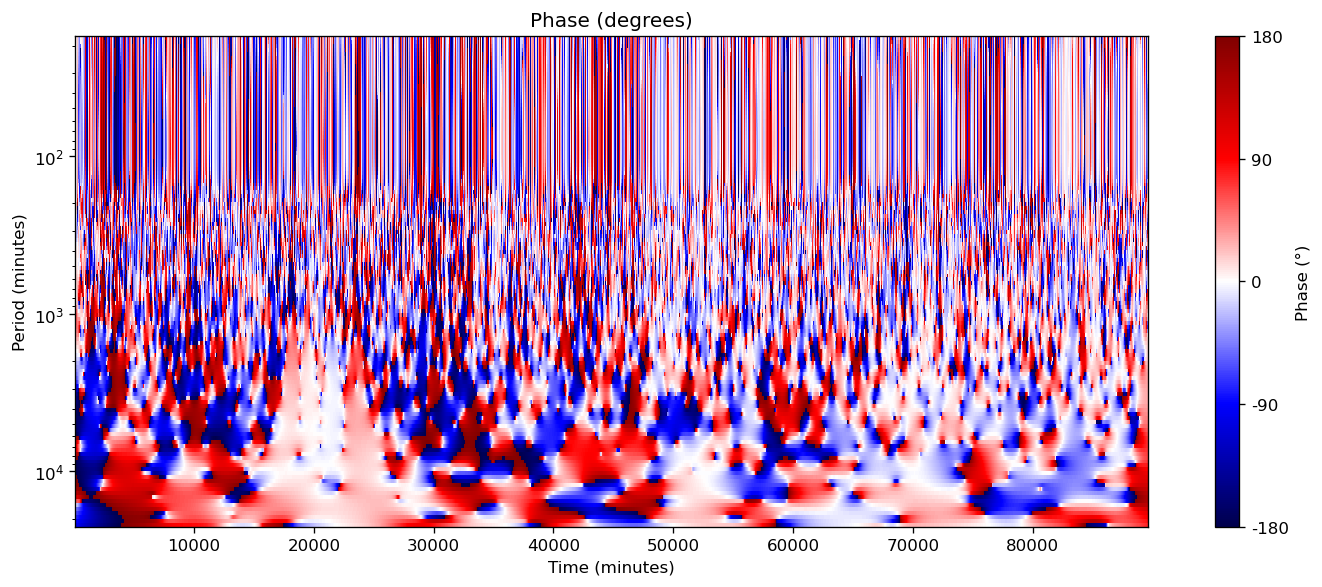

In [25]:
# --- Compute phase from cross-spectrum Sxy ---
Sxy = Wx * np.conj(Wy)  # cross-wavelet transform
phase = np.angle(Sxy)   # range: -pi to pi

# --- Plot phase map ---
fig, ax = plt.subplots(figsize=(12, 5), dpi=120)
im = ax.pcolormesh(
    t_edges, p_edges, phase,
    cmap='seismic', shading='flat', vmin=-np.pi, vmax=np.pi
)
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Period (minutes)')
ax.set_title('Phase (degrees)')
ax.set_yscale('log')
ax.invert_yaxis()

# colorbar in degrees
cbar = fig.colorbar(im, ax=ax, label='Phase (°)')
cbar.set_ticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
cbar.set_ticklabels(['-180', '-90', '0', '90', '180'])

plt.tight_layout()
plt.show()

In [26]:
THRESH = 0.65  # coherence cutoff

# Build a mask: True = exclude
mask = np.zeros_like(WCT, dtype=bool)

# 1) Exclude outside COI (periods greater than the COI curve)
if coi_period is not None:
    # periods is (Ns,), t is (Nt,)
    outside_cone = (periods[:, None] > coi_period[None, :])
    mask |= outside_cone

# 2) Exclude low coherence
mask |= (WCT < THRESH)

# Apply mask (set excluded cells to NaN so pcolormesh leaves them blank)
WCT_masked = np.where(mask, np.nan, WCT)

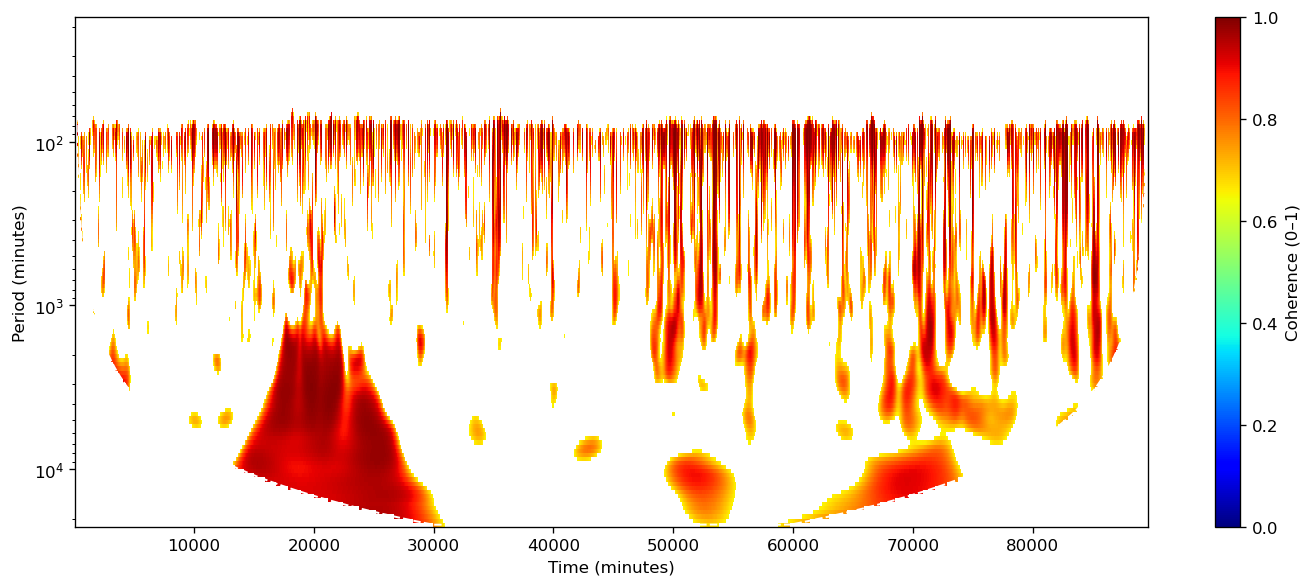

In [27]:
t_edges = centers_to_edges(t)
p_edges = centers_to_edges(periods)

fig, ax = plt.subplots(figsize=(12, 5), dpi=120)
im = ax.pcolormesh(t_edges, p_edges, WCT_masked, cmap='jet',
                   shading='flat', vmin=0, vmax=1)
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Period (minutes)')
ax.set_yscale('log'); ax.invert_yaxis()
cbar = fig.colorbar(im, ax=ax, label='Coherence (0–1)')

# Draw COI line and lightly shade outside (optional cosmetic)
if coi_period is not None:
    ax.plot(t, coi_period, 'w--', lw=1.2)
    #ax.fill_between(t, coi_period, periods.max(),
    #                where=coi_period <= periods.max(),
    #                facecolor='white', alpha=0.25, hatch='//', edgecolor='none')
plt.tight_layout()
plt.show()

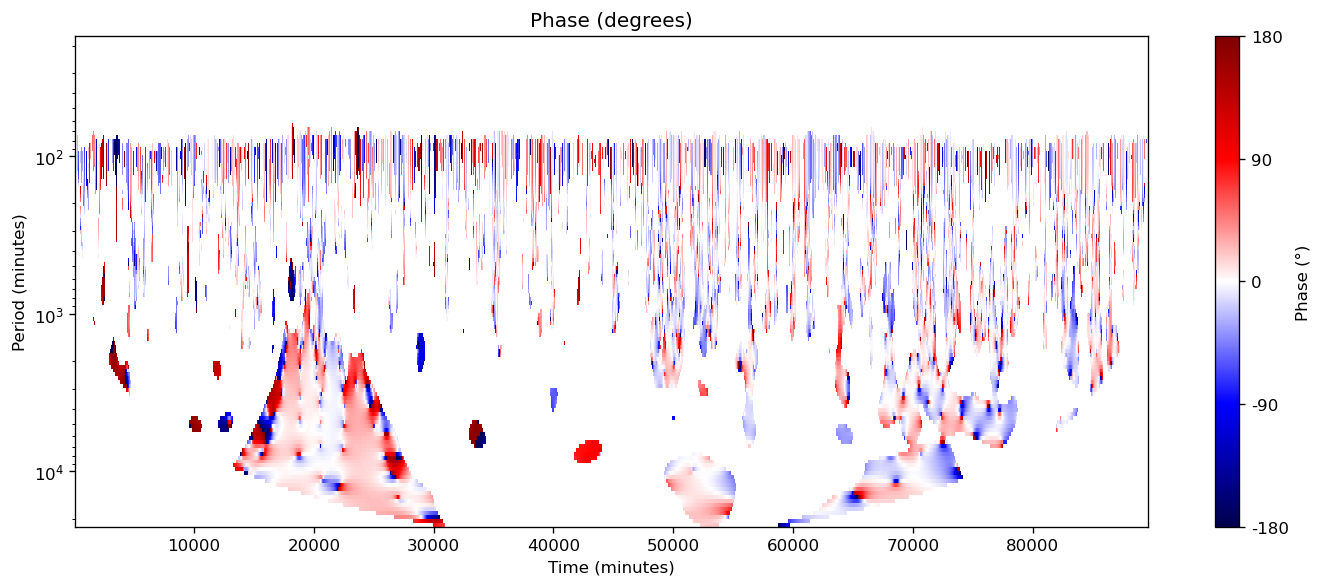

In [28]:
# Apply the same mask to phase
phase_masked = np.where(np.isnan(WCT_masked), np.nan, phase)

# --- Plot masked phase map ---
fig, ax = plt.subplots(figsize=(12, 5), dpi=120)
im = ax.pcolormesh(
    t_edges, p_edges, phase_masked,
    cmap='seismic', shading='flat', vmin=-np.pi, vmax=np.pi
)
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Period (minutes)')
ax.set_title('Phase (degrees)')
ax.set_yscale('log')
ax.invert_yaxis()

# Colorbar in degrees
cbar = fig.colorbar(im, ax=ax, label='Phase (°)')
cbar.set_ticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
cbar.set_ticklabels(['-180', '-90', '0', '90', '180'])
plt.tight_layout()
plt.show()

### WTC method

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pycwt import wavelet
import pandas as pd
# =========================
# Internal helpers (unchanged)
# =========================
def _prep_unique_sorted(t, s):
    m = np.isfinite(t) & np.isfinite(s)
    t = np.asarray(t[m], float); s = np.asarray(s[m], float)
    if t.size < 2: raise ValueError("Not enough points after filtering.")
    order = np.argsort(t); t = t[order]; s = s[order]
    dt = np.diff(t); keep = np.hstack(([True], dt != 0))
    return t[keep], s[keep]

def centers_to_edges(c):
    c = np.asarray(c, float).ravel()
    if c.size < 2: return np.array([c[0]-0.5, c[0]+0.5], float)
    dc = np.diff(c); e = np.empty(c.size + 1, float)
    e[1:-1] = c[:-1] + dc/2; e[0] = c[0] - dc[0]/2; e[-1] = c[-1] + dc[-1]/2
    return e

def cwt_wrap(sig, dt, dj, s0, J, wv='morlet'):
    out = wavelet.cwt(sig, dt, dj=dj, s0=s0, J=J, wavelet=wv)
    W, scales = out[0], out[1]
    coi = out[3] if len(out) >= 4 else None
    return W, np.asarray(scales, float), (None if coi is None else np.asarray(coi, float))

def _smooth_time_scale(A, scales, dt, dj):
    A = np.asarray(A); Ns, Nt = A.shape
    out = np.empty((Ns, Nt), dtype=np.complex128)
    scales = np.asarray(scales, float).ravel()
    for i, s in enumerate(scales):
        sigma_t = max(1e-9, np.sqrt(2.0) * (s / dt))   # samples
        L = int(np.ceil(6.0 * sigma_t))
        if 2*L + 1 > Nt: L = max(1, (Nt - 1) // 2)
        if L < 1: out[i, :] = A[i, :]; continue
        kx = np.arange(-L, L + 1, dtype=float)
        g = np.exp(-(kx**2) / (2.0 * sigma_t**2)); g /= g.sum()
        conv = np.convolve(A[i, :], g, mode='same')
        out[i, :] = conv[:Nt]
    w = max(1, int(round(1.0 / dj)))
    if w > 1:
        box = np.ones(w, dtype=float) / w
        for tcol in range(Nt):
            out[:, tcol] = np.convolve(out[:, tcol], box, mode='same')[:Ns]
    return out

def wtc_from_cwt(Wx, Wy, scales, dt, dj, eps=1e-12):
    scales = np.asarray(scales, float).ravel()
    s_inv = (1.0 / scales)[:, None]
    Wxy = Wx * np.conj(Wy)
    Sxy = _smooth_time_scale(Wxy * s_inv, scales, dt, dj)
    Sxx = _smooth_time_scale((np.abs(Wx)**2) * s_inv, scales, dt, dj)
    Syy = _smooth_time_scale((np.abs(Wy)**2) * s_inv, scales, dt, dj)
    WCT = (np.abs(Sxy)**2) / (Sxx * Syy + eps)
    return np.clip(WCT.real, 0.0, 1.0)

def coi_to_period(coi, scales, dt, fourier_factor):
    coi = np.asarray(coi, float).ravel()
    scales = np.asarray(scales, float).ravel()
    if np.nanmax(coi) <= np.nanmax(scales) * 1.05:
        return fourier_factor * coi * dt
    return coi

def match_len(x_ref, y):
    y = np.asarray(y, float).ravel(); x_ref = np.asarray(x_ref, float).ravel()
    if y.size == x_ref.size: return y
    idx = np.linspace(0, y.size - 1, x_ref.size)
    return np.interp(idx, np.arange(y.size), y)

def _z(a):
    a = np.asarray(a, float); mu, sd = a.mean(), a.std()
    return (a - mu) / (sd if sd else 1.0)

# =========================
# Public function
# =========================
def plot_wtc_from_df(
    df,
    col_x: str,
    col_y: str,
    time_col: str = 'Time',      # in MINUTES
    voices: int = 12,            # scales per octave
    w0: float = 6.0,             # Morlet omega0
    targ_len: int = 10000,       # target resample length
    show: bool = True,
    save_path: str | None = None,
    cmap: str = 'jet'
):
    """
    Make a Wavelet Transform Coherence plot for two DataFrame columns.

    Args:
        df: pandas DataFrame with time in minutes.
        col_x, col_y: names of the two signal columns.
        time_col: name of time column (minutes).
        voices: scales per octave (12 is standard).
        w0: Morlet central frequency parameter.
        targ_len: target uniform length (min of targ_len and available).
        show: show the figure.
        save_path: optional file path to save (e.g., 'wtc.png').
        cmap: colormap for coherence.

    Returns:
        (fig, ax, t, periods, WCT) for further use.
    """
    # ---- prepare inputs & common uniform time grid (minutes) ----
    t_raw = df[time_col].to_numpy(float)
    x_raw = df[col_x].to_numpy(float)
    y_raw = df[col_y].to_numpy(float)

    tx_u, x_u = _prep_unique_sorted(t_raw, x_raw)
    ty_u, y_u = _prep_unique_sorted(t_raw, y_raw)

    t0 = max(tx_u[0], ty_u[0]); t1 = min(tx_u[-1], ty_u[-1])
    if not (t1 > t0):
        raise ValueError("No overlapping time interval between the two signals.")

    n_target = max(int(min(targ_len, tx_u.size, ty_u.size)), 1024)
    t = np.linspace(t0, t1, n_target).astype(float)
    dt = float((t[-1] - t[0]) / (n_target - 1))  # minutes

    x = _z(np.interp(t, tx_u, x_u))
    y = _z(np.interp(t, ty_u, y_u))

    # ---- scale ladder (minutes) ----
    dj = 1.0 / voices
    FOURIER_FACTOR = 4*np.pi / (w0 + np.sqrt(2 + w0**2))  # ~1.033 for w0=6

    period_min = 2.0 * dt                 # smallest resolvable period
    period_max = (t[-1] - t[0]) / 4.0     # conservative large period
    s0   = period_min / (FOURIER_FACTOR * dt)
    smax = period_max / (FOURIER_FACTOR * dt)
    J    = int(np.floor(np.log2(smax / s0) / dj))

    # ---- CWTs ----
    Wx, scales, coi_x = cwt_wrap(x, dt, dj, s0, J, wv='morlet')
    Wy, scales2, coi_y = cwt_wrap(y, dt, dj, s0, J, wv='morlet')
    assert np.allclose(scales, scales2), "Internal: scale ladders mismatch."
    periods = FOURIER_FACTOR * scales * dt  # minutes

    # ---- WTC ----
    WCT = wtc_from_cwt(Wx, Wy, scales, dt, dj)

    # ---- COI (period) ----
    coi_period = None
    if coi_x is not None and coi_y is not None:
        coi_min = np.minimum(coi_x, coi_y)
        coi_period = coi_to_period(coi_min, scales, dt, FOURIER_FACTOR)
        coi_period = match_len(t, coi_period)
        coi_period = np.clip(coi_period, periods.min(), periods.max())

    # ---- Plot ----
    t_edges = centers_to_edges(t)
    p_edges = centers_to_edges(periods)

    fig, ax = plt.subplots(figsize=(12, 5), dpi=120)
    im = ax.pcolormesh(t_edges, p_edges, WCT, cmap=cmap, shading='flat', vmin=0, vmax=1)
    ax.set_title(f'Wavelet Coherence: {col_x} vs {col_y}')
    ax.set_xlabel('Time (minutes)')
    ax.set_ylabel('Period (minutes)')
    ax.set_yscale('log'); ax.invert_yaxis()
    fig.colorbar(im, ax=ax, label='Coherence (0–1)')

    if coi_period is not None:
        ax.plot(t, coi_period, 'w--', lw=1.2)
        ax.fill_between(
            t, coi_period, periods.max(),
            where=coi_period <= periods.max(),
            facecolor='white', alpha=0.35, edgecolor='none'
        )

    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=200)
    if show:
        plt.show()
    else:
        plt.close(fig)

    return fig, ax, t, periods, WCT


In [28]:
root = 'C:/Users/Haiya/Downloads/OneDrive_2025-09-19/patient_data/' 
csv= 'ID2-1_496_6.4.20.csv'
df = pd.read_csv(root + csv)
df = df.drop(index=0) 
for i in df.columns.tolist(): print (i)

ClockDateTime
Time
ADR global, 8-13/1-4 Hz, All 1020 No FP
ADR left, 8-13/1-4 Hz, Left Hemi (No Fp)
ADR right, 8-13/1-4 Hz, Right Hemi (No Fp)
TDR global , 4-8/1-4 Hz, All 1020 No FP
TDR left, 4-8/1-4 Hz, Left Hemi (No Fp)
TDR left, 4-8/1-4 Hz, Right Hemi (No Fp)
ATDR global , 4-13/1-4 Hz, All 1020 No FP
ATDR left, 4-13/1-4 Hz, Left Hemi (No Fp)
ATDR right, 4-13/1-4 Hz, Right Hemi (No Fp)
Delta total FFT, 1 - 4 Hz, All 1020 No FP
Theta total FFT, 4 - 8 Hz, All 1020 No FP
Alpha total FFT, 8 - 13 Hz, All 1020 No FP
SR global, All 1020 No FP
SR Left, Left Hemi (No Fp)
SR Right , Right Hemi (No Fp)
Delta pwr relative global , 1-4/1-20 Hz, All 1020 No FP
Delta pwr relative left, 1-4/1-20 Hz, Left Hemi (No Fp)
Delta pwr relative right, 1-4/1-20 Hz, Right Hemi (No Fp)
Theta pwr relative global , 4-8/1-20 Hz, All 1020 No FP
Theta pwr relative left, 4-8/1-20 Hz, Left Hemi (No Fp)
Theta pwr relative right, 4-8/1-20 Hz, Right Hemi (No Fp)
Alpha pwr relative global , 8-13/1-20 Hz, All 1020 No FP
A

C:\Users\Haiya\AppData\Local\Temp\ipykernel_8064\1708088925.py:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(root + csv)


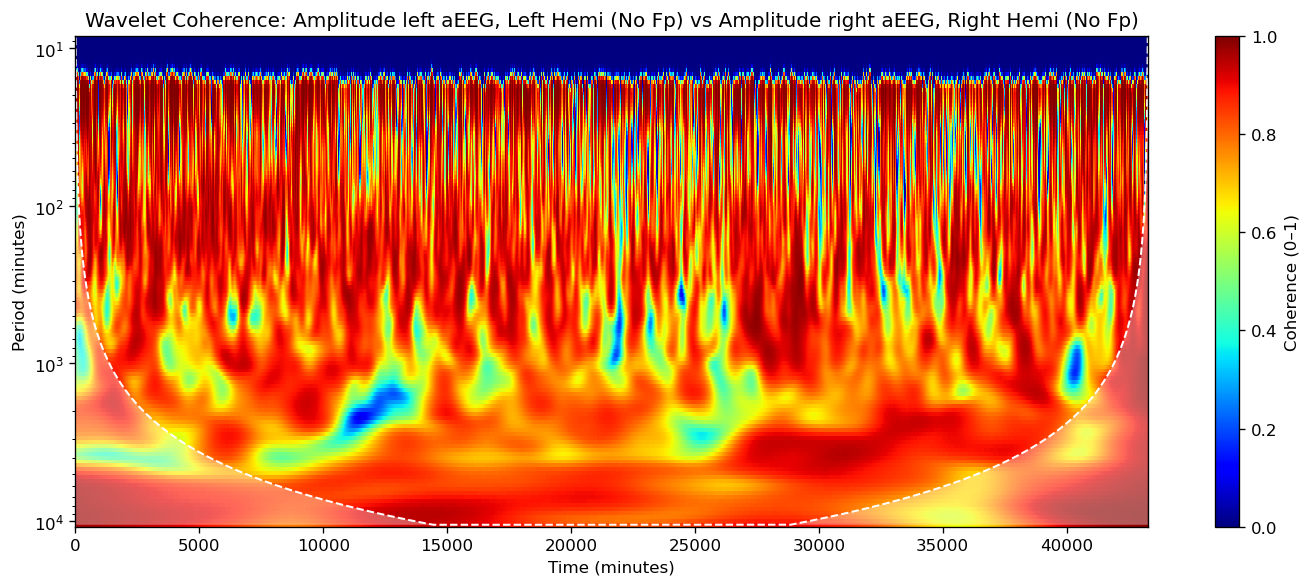

(<Figure size 1440x600 with 2 Axes>,
 <Axes: title={'center': 'Wavelet Coherence: Amplitude left aEEG, Left Hemi (No Fp) vs Amplitude right aEEG, Right Hemi (No Fp)'}, xlabel='Time (minutes)', ylabel='Period (minutes)'>,
 array([0.00000000e+00, 4.32823282e+00, 8.65646565e+00, ...,
        4.32693435e+04, 4.32736718e+04, 4.32780000e+04]),
 array([8.65646565e+00, 9.17120588e+00, 9.71655416e+00, 1.02943305e+01,
        1.09064633e+01, 1.15549953e+01, 1.22420911e+01, 1.29700437e+01,
        1.37412827e+01, 1.45583819e+01, 1.54240683e+01, 1.63412311e+01,
        1.73129313e+01, 1.83424118e+01, 1.94331083e+01, 2.05886611e+01,
        2.18129266e+01, 2.31099907e+01, 2.44841822e+01, 2.59400875e+01,
        2.74825653e+01, 2.91167637e+01, 3.08481366e+01, 3.26824622e+01,
        3.46258626e+01, 3.66848235e+01, 3.88662166e+01, 4.11773222e+01,
        4.36258531e+01, 4.62199814e+01, 4.89683645e+01, 5.18801750e+01,
        5.49651307e+01, 5.82335274e+01, 6.16962732e+01, 6.53649245e+01,
        6.92

In [31]:
plot_wtc_from_df(df, 'Amplitude left aEEG, Left Hemi (No Fp)', 'Amplitude right aEEG, Right Hemi (No Fp)', time_col='Time', save_path='wtc_left_right.png')

### visualize aEEG

In [29]:
root = 'C:/Users/Haiya/Downloads/OneDrive_2025-09-19/final/' 
csv= 'ID9-5_719_2_9.csv'
df = pd.read_csv(csv_path)

In [23]:
from pathlib import Path
import ast
import pandas as pd
import matplotlib.pyplot as plt
from typing import Iterable, Optional, Union

def plot_two_cols_from_csv(
    csv_path: Union[str, Path],
    x_col: str = "time",
    y_cols: Iterable[str] = ("aEEG_left", "aEEG_right"),
    figsize=(12, 8),
    title: Optional[str] = "aEEG vs Time",
    save_path: Optional[Union[str, Path]] = None,
    show: bool = True,
):
    """
    Load a CSV, parse any list-like string cells, and plot two columns vs an x column.

    Args:
        csv_path: Path to the CSV file.
        x_col: Name of the x-axis column (default 'time').
        y_cols: Iterable of y columns to plot (default ['aEEG_left', 'aEEG_right']).
        figsize: Matplotlib figure size.
        title: Plot title (None to omit).
        save_path: If provided, save the figure to this path (e.g., 'out.png').
        show: If True, display the plot.

    Returns:
        (fig, ax): Matplotlib figure and axes.
    """
    csv_path = Path(csv_path)

    # Load (utf-8 first; fall back to latin-1)
    try:
        df = pd.read_csv(csv_path)
    except UnicodeDecodeError:
        df = pd.read_csv(csv_path, encoding="latin-1")

    # Convert columns that look like "[...]" into Python lists
    def parse_listlike(x):
        if isinstance(x, str):
            s = x.strip()
            if s.startswith('[') and s.endswith(']'):
                try:
                    return ast.literal_eval(s)
                except Exception:
                    return x
        return x

    df = df.applymap(parse_listlike)

    # Plot
    ax = df.plot(x=x_col, y=list(y_cols), figsize=figsize)
    ax.set_xlabel(f"{x_col} (s)" if x_col.lower() == "time" else x_col)
    ax.set_ylabel("aEEG")
    if title:
        ax.set_title(title)
    fig = ax.get_figure()
    plt.tight_layout()

    if save_path is not None:
        save_path = Path(save_path)
        save_path.parent.mkdir(parents=True, exist_ok=True)
        fig.savefig(save_path, dpi=200)

    if show:
        plt.show()
    else:
        plt.close(fig)

    return fig, ax


C:\Users\Haiya\AppData\Local\Temp\ipykernel_13712\1465284174.py:50: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(parse_listlike)


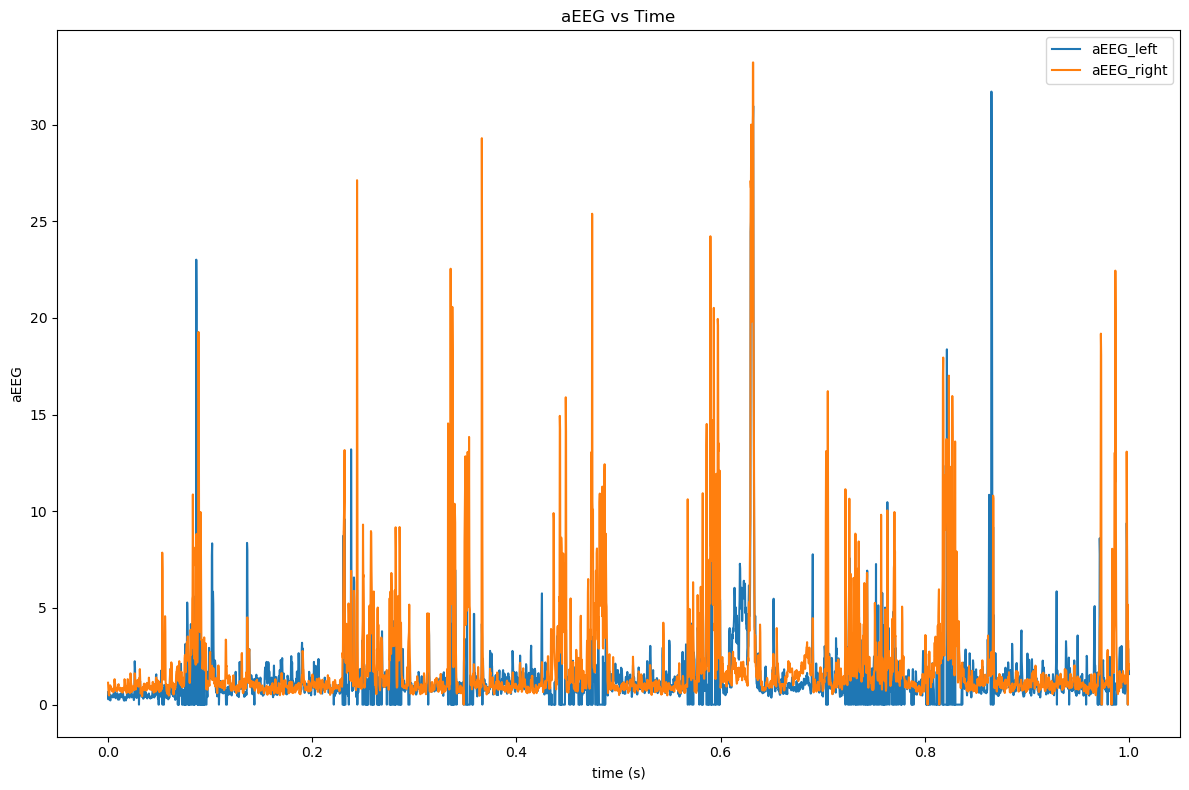

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'aEEG vs Time'}, xlabel='time (s)', ylabel='aEEG'>)

In [25]:
plot_two_cols_from_csv(root+csv)

In [32]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Optional

def plot_cwt_from_df(
    df: pd.DataFrame,
    sig_col: str,
    time_col: str = "time",
    wavelet: str = "cmor1.5-1.0",   # complex Morlet (bandwidth-center)
    fmin: float = 0.5,               # Hz
    fmax: Optional[float] = None,    # Hz; default set from sampling rate
    n_freqs: int = 96,
    detrend: bool = False,
    normalize: bool = False,
    title: Optional[str] = None,
    save_path: Optional[str] = None,
    show: bool = True,
):
    """
    Plot CWT scalogram for one signal column in a DataFrame.

    Args:
        df: DataFrame containing time and signal.
        sig_col: Name of the signal column to analyze.
        time_col: Name of the time column (seconds). If missing, assumes uniform sampling.
        wavelet: PyWavelets wavelet (e.g., 'cmor1.5-1.0', 'morl').
        fmin/fmax: Frequency bounds in Hz (scalogram y-axis).
        n_freqs: Number of frequency samples (vertical resolution).
        detrend: If True, remove linear trend from the signal.
        normalize: If True, z-score the signal before CWT.
        title: Plot title; default uses column name.
        save_path: If provided, save figure here (e.g., 'out.png').
        show: If False, closes the figure after saving/creating.

    Returns:
        (fig, ax, freqs, power) where power is (n_freqs, n_times).
    """
    # ---- extract time & signal ----
    if time_col in df.columns:
        t = df[time_col].to_numpy(dtype=float)
        dt = float(np.median(np.diff(t)))
    else:
        # fallback: infer dt from index spacing (assume uniform)
        n = len(df)
        t = np.arange(n, dtype=float)
        dt = 1.0

    x = pd.to_numeric(df[sig_col], errors="coerce").to_numpy(dtype=float)
    # handle NaNs
    if np.isnan(x).any():
        x = pd.Series(x).ffill().bfill().to_numpy()
        x = np.nan_to_num(x, nan=0.0)

    if detrend:
        # simple linear detrend
        idx = np.arange(x.size)
        p = np.polyfit(idx, x, 1)
        x = x - np.polyval(p, idx)

    if normalize:
        mu, sd = np.mean(x), np.std(x) if np.std(x) > 0 else 1.0
        x = (x - mu) / sd

    fs = 1.0 / dt
    if fmax is None:
        fmax = min(40.0, 0.45 * fs)  # safe default for aEEG-like data

    # ---- freq->scale mapping for PyWavelets ----
    fc = pywt.central_frequency(wavelet)  # central freq of chosen wavelet
    freqs = np.geomspace(fmin, fmax, n_freqs)
    scales = fc / (freqs * dt)

    # ---- CWT ----
    coeffs, _ = pywt.cwt(x, scales, wavelet, sampling_period=dt)
    power = np.abs(coeffs) ** 2  # scalogram

    # ---- plot ----
    fig, ax = plt.subplots(figsize=(10, 4), dpi=150)
    im = ax.imshow(
        power,
        extent=[t[0], t[-1], freqs[0], freqs[-1]],
        origin="lower",
        aspect="auto",
    )
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(title or f"CWT scalogram — {sig_col}")
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label("Power")
    plt.tight_layout()

    if save_path:
        Path(save_path).parent.mkdir(parents=True, exist_ok=True)
        fig.savefig(save_path, dpi=200)

    if show:
        plt.show()
    else:
        plt.close(fig)

    return fig, ax, freqs, power


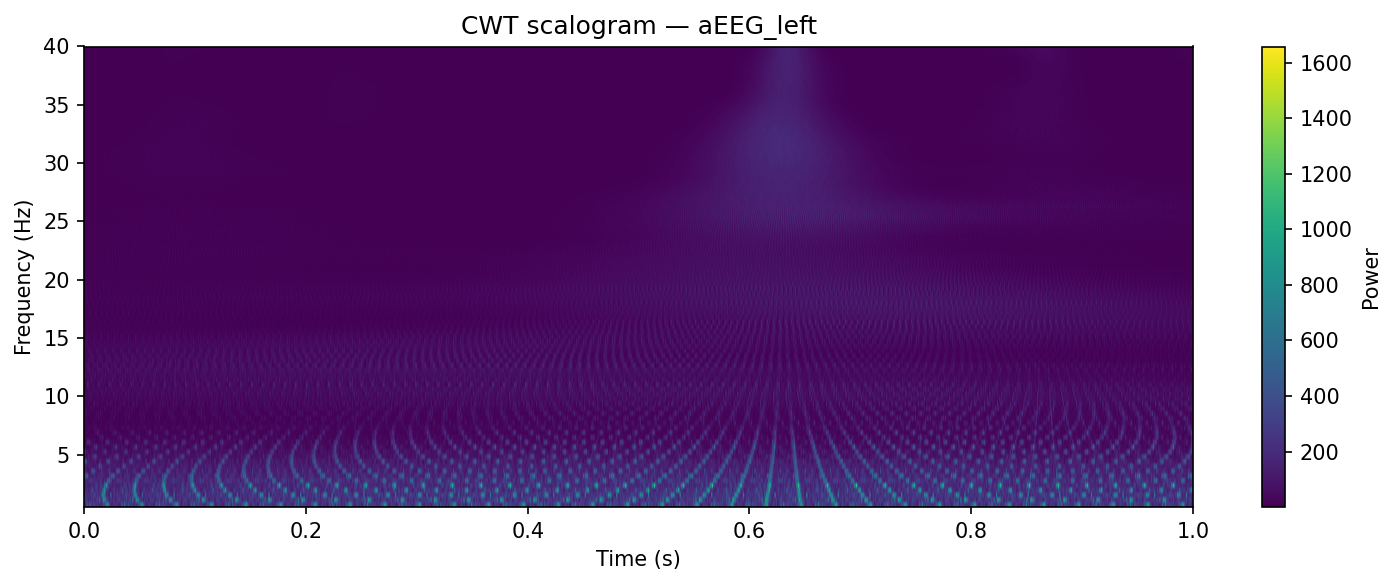

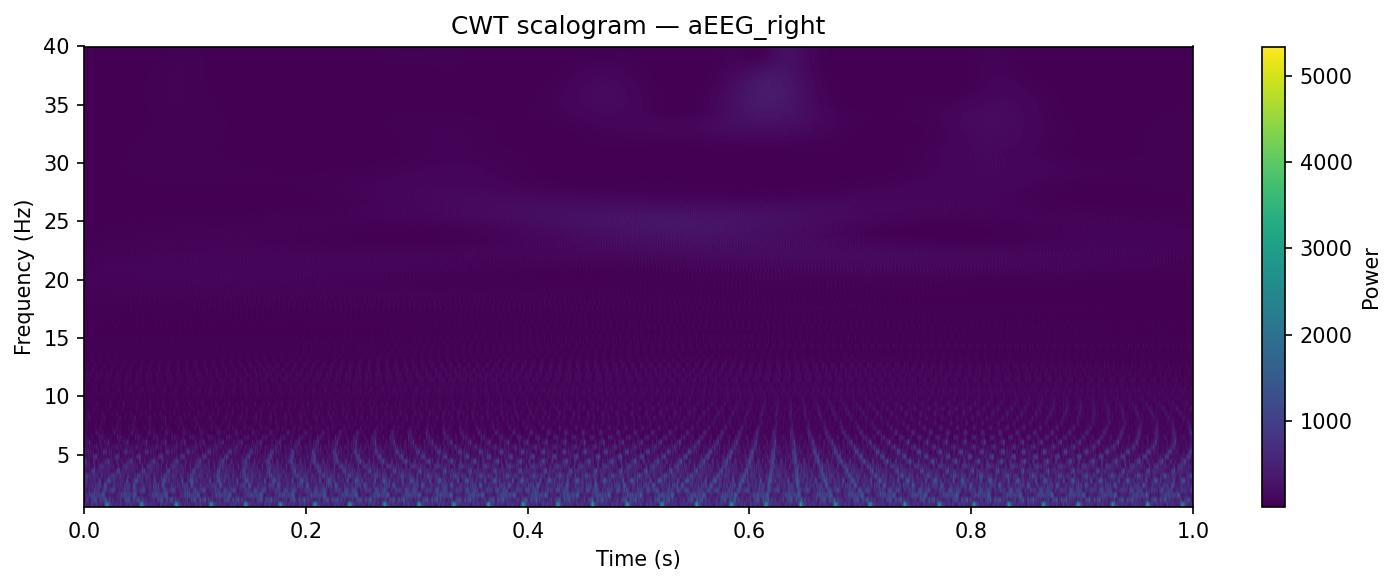

In [36]:
# One column (e.g., aEEG_left) with time in seconds
fig, ax, freqs, power = plot_cwt_from_df(df, sig_col="aEEG_left", time_col="time")
fig, ax, freqs, power = plot_cwt_from_df(df, sig_col="aEEG_right", time_col="time")

In [89]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Optional
import numpy as np
import pickle

def plot_cwt_from_df(
    df: pd.DataFrame,
    sig_col: str,
    time_col: str = "time",
    time_unit: str = "hours",        # "hours" or "seconds"
    xaxis_unit: str = "hours",       # "hours" or "seconds" (display only)
    wavelet: str = "cmor1.5-1.0",
    fmin: float = 0.5,               # Hz
    fmax: Optional[float] = 6,    # Hz
    n_freqs: int = 96,
    detrend: bool = False,
    normalize: bool = False,
    title: Optional[str] = None,
    save_path: Optional[str] = None,
    show: bool = True,
):
    """
    Plot CWT scalogram for one signal column where time is stored in HOURS (sec/3600) or SECONDS.

    - time_unit: unit of the input time column ("hours" if seconds/3600).
    - xaxis_unit: unit to display on x-axis (independent of computation).
    """
    # ---- extract time & convert to seconds for analysis ----
    t_raw = df[time_col].to_numpy(dtype=float)
    if time_unit.lower().startswith("hour"):
        t_sec = t_raw * 3600.0
    else:
        t_sec = t_raw

    # sampling step in seconds
    dt = float(np.median(np.diff(t_sec)))
    fs = 1.0 / dt

    # choose x values to display
    if xaxis_unit.lower().startswith("hour"):
        t_disp = t_sec / 3600.0
        xlab = "Time (h)"
    else:
        t_disp = t_sec
        xlab = "Time (s)"

    # ---- signal ----
    x = pd.to_numeric(df[sig_col], errors="coerce").to_numpy(dtype=float)
    if np.isnan(x).any():
        x = pd.Series(x).ffill().bfill().to_numpy()
        x = np.nan_to_num(x, nan=0.0)

    if detrend:
        idx = np.arange(x.size)
        p = np.polyfit(idx, x, 1)
        x = x - np.polyval(p, idx)

    if normalize:
        sd = np.std(x)
        x = (x - np.mean(x)) / (sd if sd > 0 else 1.0)

    # ---- frequency range and scales (computed in Hz using dt in seconds) ----
    if fmax is None:
        fmax = min(40.0, 0.45 * fs)  # safe default cap + Nyquist margin
    freqs = np.geomspace(fmin, fmax, n_freqs)

    wave = wavelet
    fc = pywt.central_frequency(wave)
    scales = fc / (freqs * dt)

    # ---- CWT ----
    coeffs, _ = pywt.cwt(x, scales, wave, sampling_period=dt)  # dt in SECONDS
    power = np.abs(coeffs) ** 2
    print('coeffs=',coeffs.shape)

    # ---- plot ----
    fig, ax = plt.subplots(figsize=(10, 4), dpi=150)
    im = ax.imshow(
        power,
        extent=[t_disp[0], t_disp[-1], freqs[0], freqs[-1]],
        origin="lower",
        aspect="auto",
    )
    ax.set_xlabel(xlab)
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(title or f"CWT scalogram — {sig_col}")
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label("Power")
    plt.tight_layout()

    if save_path:
        with open("matrix.pkl", "wb") as f: pickle.dump(power, f, protocol=pickle.HIGHEST_PROTOCOL)

    if show:
        plt.show()
    else:
        plt.close(fig)

    return fig, ax, freqs, power


coeffs= (96, 3600)


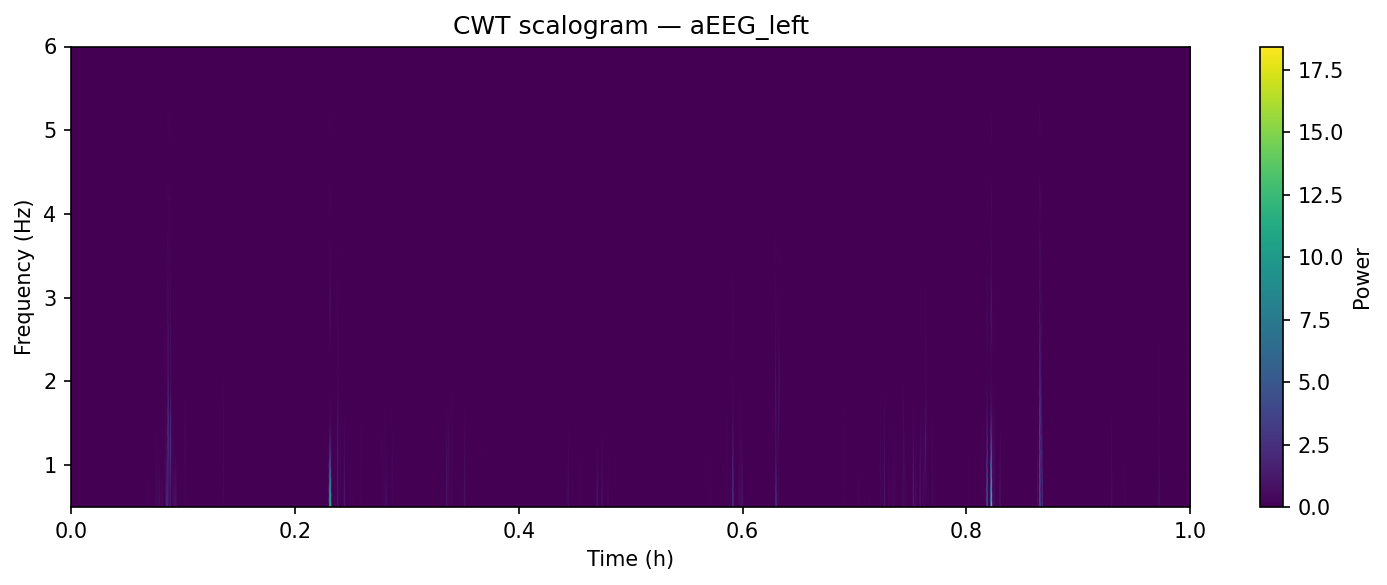

coeffs= (96, 3600)


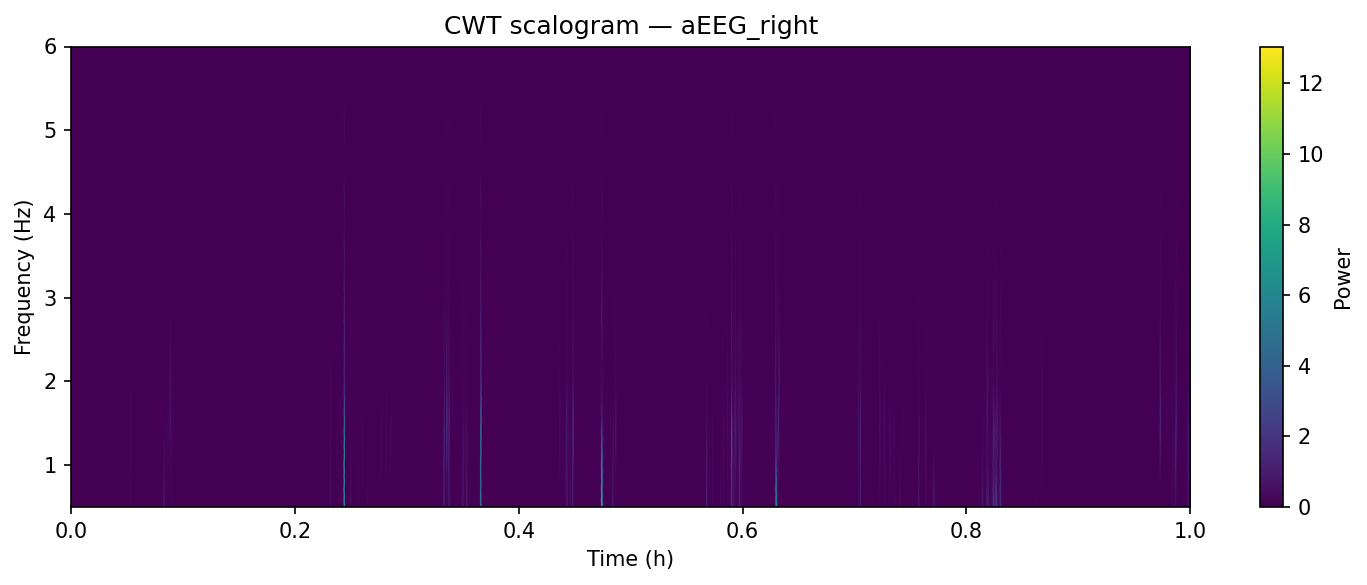

(<Figure size 1500x600 with 2 Axes>,
 <Axes: title={'center': 'CWT scalogram — aEEG_right'}, xlabel='Time (h)', ylabel='Frequency (Hz)'>,
 array([0.5       , 0.513251  , 0.52685318, 0.54081585, 0.55514856,
        0.56986111, 0.58496357, 0.60046628, 0.61637984, 0.63271514,
        0.64948336, 0.66669597, 0.68436476, 0.70250179, 0.7211195 ,
        0.74023062, 0.75984821, 0.77998571, 0.8006569 , 0.82187591,
        0.84365728, 0.86601589, 0.88896704, 0.91252645, 0.93671024,
        0.96153494, 0.98701754, 1.01317549, 1.04002667, 1.06758946,
        1.09588273, 1.12492582, 1.15473861, 1.1853415 , 1.21675543,
        1.24900189, 1.28210294, 1.31608124, 1.35096004, 1.38676319,
        1.4235152 , 1.46124121, 1.49996703, 1.53971917, 1.58052481,
        1.62241189, 1.66540906, 1.70954574, 1.75485214, 1.80135924,
        1.84909887, 1.8981037 , 1.94840726, 2.00004396, 2.05304914,
        2.10745906, 2.16331095, 2.22064303, 2.27949453, 2.33990571,
        2.40191791, 2.46557355, 2.5309162 , 2.

In [91]:
# time column is in hours (seconds/3600). Show x-axis in hours.
plot_cwt_from_df(df, sig_col="aEEG_left", time_col="time",
                 time_unit="hours", xaxis_unit="hours")
plot_cwt_from_df(df, sig_col="aEEG_right", time_col="time",
                 time_unit="hours", xaxis_unit="hours")

In [84]:
root = 'C:/Users/Haiya/Downloads/OneDrive_2025-09-19/patient_data_bigseconds_split/' 
csv= 'ID9-5_719_2_9.csv'
df = pd.read_csv(csv_path)

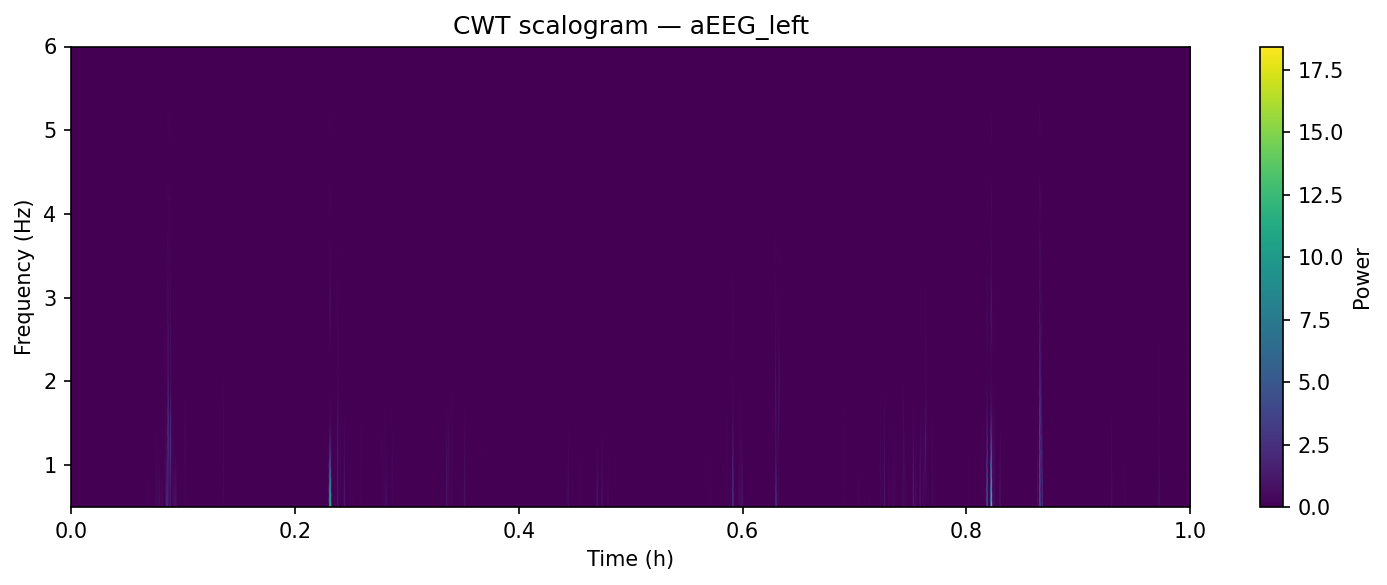

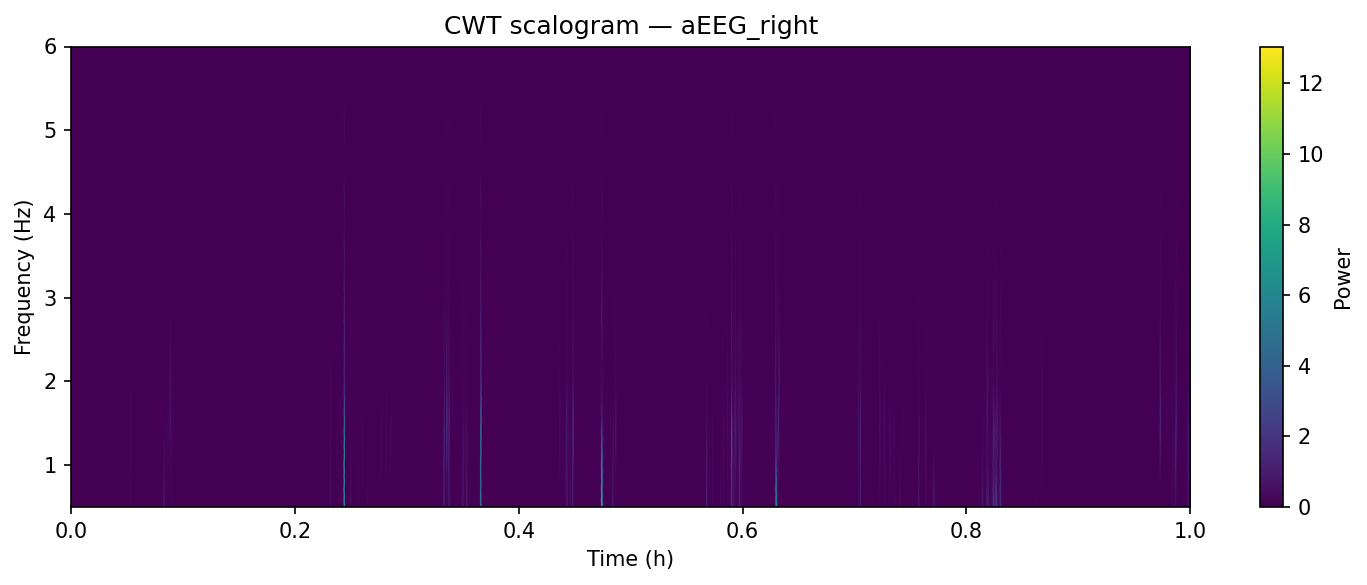

(<Figure size 1500x600 with 2 Axes>,
 <Axes: title={'center': 'CWT scalogram — aEEG_right'}, xlabel='Time (h)', ylabel='Frequency (Hz)'>,
 array([0.5       , 0.513251  , 0.52685318, 0.54081585, 0.55514856,
        0.56986111, 0.58496357, 0.60046628, 0.61637984, 0.63271514,
        0.64948336, 0.66669597, 0.68436476, 0.70250179, 0.7211195 ,
        0.74023062, 0.75984821, 0.77998571, 0.8006569 , 0.82187591,
        0.84365728, 0.86601589, 0.88896704, 0.91252645, 0.93671024,
        0.96153494, 0.98701754, 1.01317549, 1.04002667, 1.06758946,
        1.09588273, 1.12492582, 1.15473861, 1.1853415 , 1.21675543,
        1.24900189, 1.28210294, 1.31608124, 1.35096004, 1.38676319,
        1.4235152 , 1.46124121, 1.49996703, 1.53971917, 1.58052481,
        1.62241189, 1.66540906, 1.70954574, 1.75485214, 1.80135924,
        1.84909887, 1.8981037 , 1.94840726, 2.00004396, 2.05304914,
        2.10745906, 2.16331095, 2.22064303, 2.27949453, 2.33990571,
        2.40191791, 2.46557355, 2.5309162 , 2.

In [86]:
# time column is in hours (seconds/3600). Show x-axis in hours.
plot_cwt_from_df(df, sig_col="aEEG_left", time_col="time",
                 time_unit="hours", xaxis_unit="hours")
plot_cwt_from_df(df, sig_col="aEEG_right", time_col="time",
                 time_unit="hours", xaxis_unit="hours")

In [93]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Optional
import numpy as np
import pickle

def save_cwt_from_df(
    df: pd.DataFrame,
    sig_col: str,
    time_col: str = "time",
    time_unit: str = "hours",        # "hours" or "seconds"
    xaxis_unit: str = "hours",       # "hours" or "seconds" (display only)
    wavelet: str = "cmor1.5-1.0",
    fmin: float = 0.5,               # Hz
    fmax: Optional[float] = 6,    # Hz
    n_freqs: int = 96,
    detrend: bool = False,
    normalize: bool = False,
    title: Optional[str] = None,
    save_path: Optional[str] = None,
    show: bool = True,
    save_name: str = None,
):
    """
    Plot CWT scalogram for one signal column where time is stored in HOURS (sec/3600) or SECONDS.

    - time_unit: unit of the input time column ("hours" if seconds/3600).
    - xaxis_unit: unit to display on x-axis (independent of computation).
    """
    # ---- extract time & convert to seconds for analysis ----
    t_raw = df[time_col].to_numpy(dtype=float)
    if time_unit.lower().startswith("hour"):
        t_sec = t_raw * 3600.0
    else:
        t_sec = t_raw

    # sampling step in seconds
    dt = float(np.median(np.diff(t_sec)))
    fs = 1.0 / dt

    # choose x values to display
    if xaxis_unit.lower().startswith("hour"):
        t_disp = t_sec / 3600.0
        xlab = "Time (h)"
    else:
        t_disp = t_sec
        xlab = "Time (s)"

    # ---- signal ----
    x = pd.to_numeric(df[sig_col], errors="coerce").to_numpy(dtype=float)
    if np.isnan(x).any():
        x = pd.Series(x).ffill().bfill().to_numpy()
        x = np.nan_to_num(x, nan=0.0)

    if detrend:
        idx = np.arange(x.size)
        p = np.polyfit(idx, x, 1)
        x = x - np.polyval(p, idx)

    if normalize:
        sd = np.std(x)
        x = (x - np.mean(x)) / (sd if sd > 0 else 1.0)

    # ---- frequency range and scales (computed in Hz using dt in seconds) ----
    if fmax is None:
        fmax = min(40.0, 0.45 * fs)  # safe default cap + Nyquist margin
    freqs = np.geomspace(fmin, fmax, n_freqs)

    wave = wavelet
    fc = pywt.central_frequency(wave)
    scales = fc / (freqs * dt)

    # ---- CWT ----
    coeffs, _ = pywt.cwt(x, scales, wave, sampling_period=dt)  # dt in SECONDS
    power = np.abs(coeffs) ** 2
    print('coeffs=',coeffs.shape)

    if save_path:
        with open(save_name, "wb") as f: pickle.dump(power, f, protocol=pickle.HIGHEST_PROTOCOL)
    return freqs, power


[WARN] Could not extract ID from: feature_means_by_file.csv. Skipping.


C:\Users\Haiya\AppData\Local\Temp\ipykernel_8064\2799474720.py:30: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path)


Saved means table to: C:\Users\Haiya\Downloads\OneDrive_2025-09-19\patient_data_clean\feature_means_by_file.csv


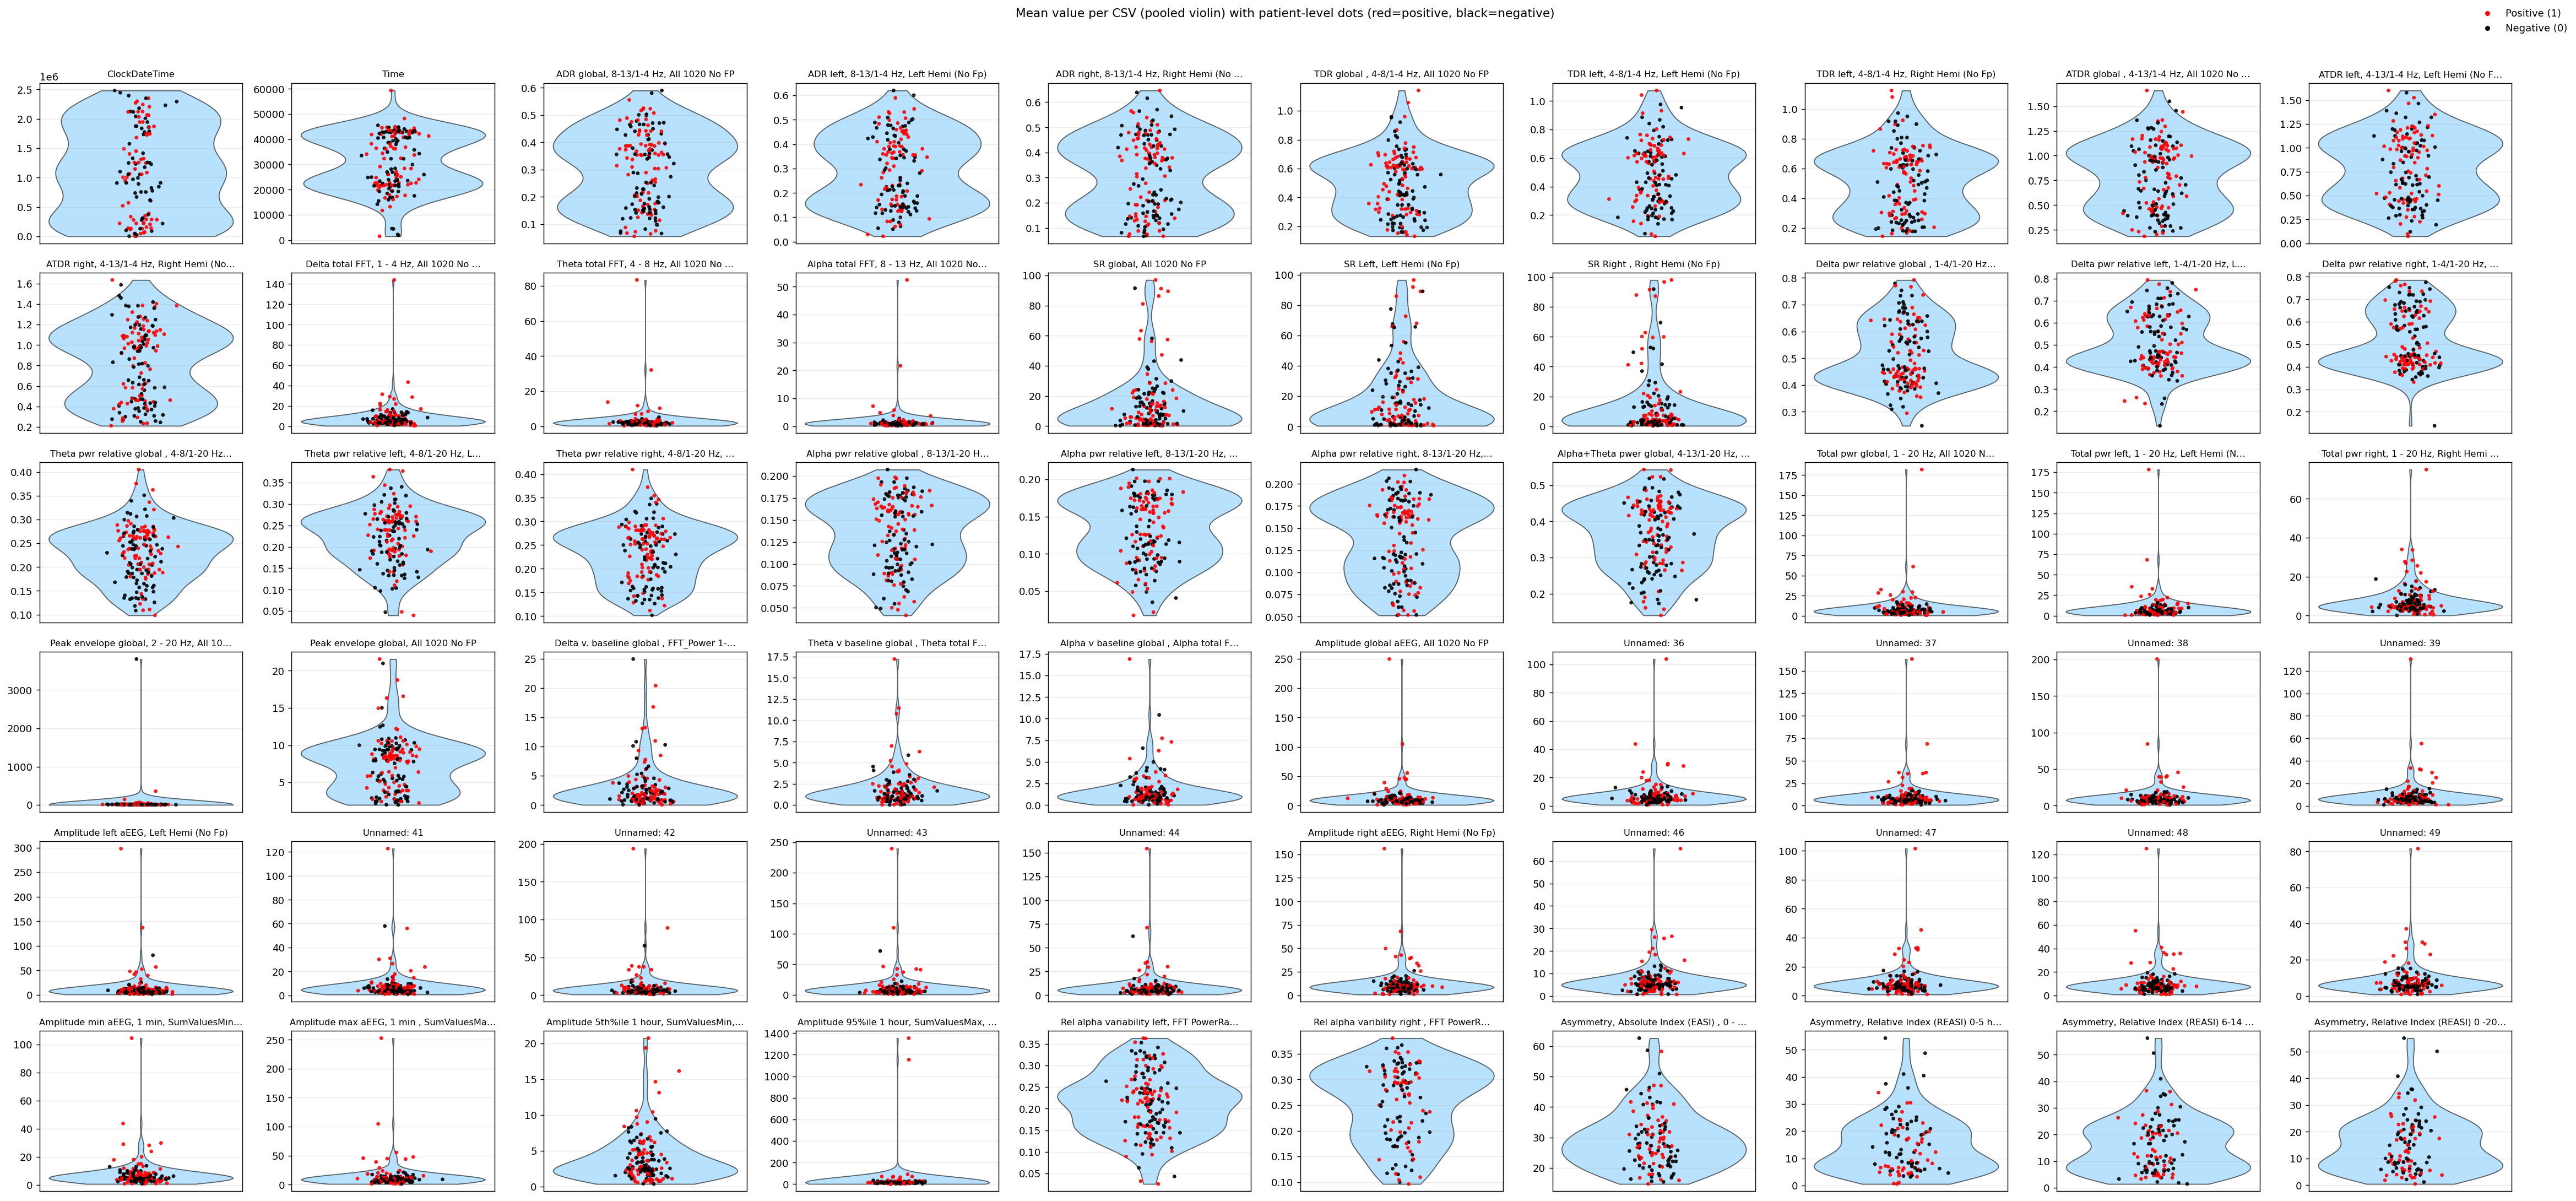

Saved figure to: C:\Users\Haiya\Downloads\OneDrive_2025-09-19\patient_data_clean\feature_means_violin_60.png


In [75]:
import re
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========== CONFIG ==========
IN_DIR = Path(r"C:\Users\Haiya\Downloads\OneDrive_2025-09-19\patient_data_clean")
POSITIVE_IDS = {1, 2, 4, 11, 16, 19, 20, 21, 22, 25, 28, 32, 37, 38, 39,
                42, 43, 44, 46, 49, 50, 51, 55, 56, 58, 59, 61, 62, 64,
                65, 66, 67, 69, 73, 78}
N_SUBPLOTS = 60                 # make 60 subplots
GRID = (6, 10)                  # 6 rows x 10 cols
OUTPUT_FIG = IN_DIR / "feature_means_violin_60.png"
SAVE_MEANS_CSV = IN_DIR / "feature_means_by_file.csv"   # optional

# ========== HELPERS ==========
id_re = re.compile(r'ID(\d+)', flags=re.IGNORECASE)

def extract_id_from_name(name: str) -> int | None:
    """
    Extract patient ID from filename like 'ID16-4_590_7.19.21.csv' -> 16.
    Returns None if not found.
    """
    m = id_re.search(name)
    return int(m.group(1)) if m else None

def safe_read_csv(path: Path) -> pd.DataFrame:
    try:
        return pd.read_csv(path)
    except UnicodeDecodeError:
        return pd.read_csv(path, encoding="latin-1")

def numeric_means(df: pd.DataFrame, zero_tol: float = 0.0) -> pd.Series:
    """
    Convert all columns to numeric (coerce errors to NaN) and compute the mean
    of values > zero_tol per column. Zeros (<= zero_tol) are treated as missing.

    Args:
        df: input DataFrame with time-series features.
        zero_tol: values <= zero_tol are considered 'missing' and ignored.

    Returns:
        pd.Series of column means (NaN if a column has no values > zero_tol).
    """
    # Make everything numeric; non-numeric -> NaN
    num = df.apply(pd.to_numeric, errors='coerce')

    # Mask values <= zero_tol as NaN (i.e., treat as missing)
    masked = num.where(num > zero_tol, np.nan)

    # Mean over remaining values
    return masked.mean(axis=0, skipna=True)

def shorten(label: str, maxlen: int = 40) -> str:
    return (label if len(label) <= maxlen else label[:maxlen-1] + "…")

# ========== LOAD & AGGREGATE ==========
records = []
feature_order = None  # to keep consistent subplot order

csv_paths = sorted(IN_DIR.glob("*.csv"))
if not csv_paths:
    raise FileNotFoundError(f"No CSV files found in {IN_DIR}")

for i, p in enumerate(csv_paths, 1):
    df = safe_read_csv(p)
    # Compute numeric means for all columns
    means = numeric_means(df)

    # capture first file’s column order (only numeric columns)
    if feature_order is None:
        feature_order = [c for c in means.index if pd.api.types.is_number(means[c]) or np.issubdtype(type(means[c]), np.number)]

    # extract ID & label
    pid = extract_id_from_name(p.name)
    if pid is None:
        # skip files without a parsable ID
        print(f"[WARN] Could not extract ID from: {p.name}. Skipping.")
        continue
    label = 1 if pid in POSITIVE_IDS else 0

    rec = {"__file__": p.name, "__id__": pid, "__label__": label}
    # add feature means
    for col, val in means.items():
        rec[col] = val
    records.append(rec)

if not records:
    raise RuntimeError("No valid files processed (no IDs found?).")

means_df = pd.DataFrame.from_records(records)
# Persist a tidy version (optional)
means_df.to_csv(SAVE_MEANS_CSV, index=False)
print(f"Saved means table to: {SAVE_MEANS_CSV}")

# Determine feature columns to plot (numeric only, exclude meta cols)
meta_cols = {"__file__", "__id__", "__label__"}
all_cols = [c for c in means_df.columns if c not in meta_cols]
# keep numeric
feat_cols = [c for c in all_cols if pd.api.types.is_numeric_dtype(means_df[c])]
# prefer first-file order if possible
if feature_order:
    feat_cols_sorted = [c for c in feature_order if c in feat_cols]
    # add any remaining (unlikely)
    feat_cols_sorted += [c for c in feat_cols if c not in feat_cols_sorted]
else:
    feat_cols_sorted = feat_cols

# Take the first 60 features (or less if not enough)
feat_cols_sorted = feat_cols_sorted[:N_SUBPLOTS]
if len(feat_cols_sorted) < N_SUBPLOTS:
    print(f"[INFO] Only {len(feat_cols_sorted)} numeric features found; making {len(feat_cols_sorted)} subplots.")

# ========== PLOT ==========
fig, axes = plt.subplots(GRID[0], GRID[1], figsize=(3.6*GRID[1], 2.8*GRID[0]), dpi=130)
axes = np.atleast_1d(axes).ravel()

# x jitter helper for dots
rng = np.random.default_rng(42)
x_center = 0.0

labels = means_df["__label__"].to_numpy()
colors = np.where(labels == 1, "red", "black")

for ax, col in zip(axes, feat_cols_sorted):
    y = means_df[col].to_numpy(dtype=float)
    y = y[np.isfinite(y)]  # drop NaNs if any

    # Violin of the pooled distribution
    parts = ax.violinplot([y], positions=[x_center], showmeans=False, showextrema=False, widths=0.6)
    # style violin
    for pc in parts['bodies']:
        pc.set_facecolor("#87CEFA")  # light-ish
        pc.set_edgecolor("k")
        pc.set_alpha(0.6)

    # Overlay dots (one per file), colored by label
    # jitter for visibility
    jitter = rng.normal(loc=0.0, scale=0.04, size=len(means_df))
    ax.scatter(np.full(len(means_df), x_center) + jitter, means_df[col], s=14, c=colors, alpha=0.9, linewidths=0)

    ax.set_title(shorten(col), fontsize=9)
    ax.set_xticks([])  # hide x ticks
    ax.grid(True, axis='y', alpha=0.25)

# turn off any extra axes
for k in range(len(feat_cols_sorted), len(axes)):
    axes[k].axis('off')

# Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Positive (1)', markerfacecolor='red', markersize=6),
    Line2D([0], [0], marker='o', color='w', label='Negative (0)', markerfacecolor='black', markersize=6),
]
fig.legend(handles=legend_elements, loc='upper right', frameon=False)

fig.suptitle("Mean value per CSV (pooled violin) with patient-level dots (red=positive, black=negative)", y=0.995, fontsize=12)
plt.tight_layout(rect=[0, 0, 0.98, 0.97])
fig.savefig(OUTPUT_FIG, dpi=1000)
plt.show()

print(f"Saved figure to: {OUTPUT_FIG}")